Ini merupakan data pencari kerja dimana orang-orang mendaftar untuk membuat kartu kuning di dinas tenaga kerja

data ini terdiri dari beberapa kolom diantaranya:

    1.tanggal daftar --> merupakan tanggal user mendaftarkan diri untuk membuat kartu kuning
    2. nama --> nama user yang didaftarkan 
    3. asal lahir --> asal lahir user berdasarkan ktp
    4. tanggal lahir --> tanggal lahir berdasarkan ktp 
    5. jenis kelamin --> jenis kelamin berdasarkan ktp
    6. alamat --> alamat berdasarkan keadaan tinggal saat ini
    7. kecamatan --> kecamatan berdasarkan keadaan tinggal saat ini
    8. status --> status seperti: a) sudah menikah, b) belum menikah, c) janda, d) duda
    9. pendidikan --> pendidikan terakhir yang diambil
    10. jurusan --> jurusan berdasarkan pendidikan yang diambil (bila ada)
    11. tahun lulus --> tahun lulus berdasarkan pendidikan yang diambil
    12. pengalaman kerja/diterima --> status pengalaman kerja (pernah bekerja dimana saja (jika ada))
    13. keterampilan --> keterampilan yang dimiliki
    14. pengalman --> sama dengan kolom pengalaman kerja/diterima
    15. No.Hp --> no hp user untuk dihubungi (active) oleh rekruter bila ada
    16. email --> email user untuk dihubungi (active) oleh rekruter bila ada

dari data pencari kerja juga, perusahaan biasa meminta list nya untuk dicari calon-calon pekerja
kartu kuning ini biasa digunakan untuk melakukan lamaran kerja.
kartu kuning jg digunakan untuk upaya Dinas Tenaga Kerja bisa melakukan pendataan mengenai jumlah pencari kerja yang ada di daerah cakupan Disnaker tersebut.



    Note:
  1. Drop kolom No Hp, Email, dan Pengalaman kerja/diterima
  2. Untuk kolom Pengalaman kerja/diterima --> isinya dipindah ke dalam kolom Pengalaman
  3. Cek format data untuk masin-masing sheet dari Januari - September
  4. Cek unique untuk kategorikal data
  5. Cek Duplikat
  6. Cek format penulisan di tiap kolom, untuk unique data --> agar tidak ada yg ambigu
  7. Bisa ditambah kolom baru yaitu Age, dengan proses --> pengurangan antara tgl daftar dengan tgl lahir
  8. Cek missing values, ada kasus khusus missing values di kolom table ['Perlu dicari solusinya']
  9. Kolom Alamat diperkirakan akan di drop --> silahkan diskusikan dengan yg berpengalaman
  10. Ada kasus missing values karena terdapat keterkaitan dengan kolom lainnya, contoh;
      a) kolom pendidikan mempengaruhi jurusan. Jika pendidikannya rendah diperkirakan tidak ada jurusannya
        
  11. kolom pengalaman kerja dapat diubah dengan kategori: 
      a) memiliki pengalaman kerja[0], 
      b) atau tidak memiliki pengalaman kerja [1]

In [1]:
#!pip install chart-studio
#pip install plotly==5.11.0
#!pip install -U kaleido

# Import Libraries

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
from chart_studio import plotly
import chart_studio.plotly as py

#import plotly.plotly as py
import plotly.offline as pyo
import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')

# Load Data

In [3]:
# Load Data --> Concat sheet Januari - September to 1 sheet

pk = pd.concat(pd.read_excel('PK_Completed.xlsx', sheet_name = ['Januari', 'Februari', 'Maret', 
                                                                'April', 'Mei', 'Juni', 
                                                                'Juli', 'Agustus', 'September']), ignore_index = True)

pk.head(2)

Tanggal Daftar            Nama   Asal Lahir Tanggal Lahir Jenis Kelamin  \
0     2022-01-03         Maryati   Pandeglang    02/05/2002     Perempuan   
1     2022-01-26  Kokom komariah  Pandeglang     26/12/2001     Perempuan   

                  Alamat Lengkap Kecamatan       Status Pendidikan  \
0        Kp. Kadu Payung 007/004    Cisata  Belum Kawin        SMK   
1  Kp. Kadu sirung rt 002 rw 003  Pulosari  Belum Kawin        SMK   

      Jurusan Tahun Lulus Pengalaman kerja/Diterima Keterampilan Pengalaman  \
0   Akuntansi        2020                       NaN          NaN        NaN   
1  Akuntansi         2019                       NaN          NaN        NaN   

           No HP                      Email  
0  85282375613.0  maryati05032002@gmail.com  
1  85935333988.0    kokmkomriah26@gmail.com

In [4]:
# Check data info

pk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7146 entries, 0 to 7145
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Tanggal Daftar             7146 non-null   datetime64[ns]
 1   Nama                       7146 non-null   object        
 2   Asal Lahir                 7146 non-null   object        
 3   Tanggal Lahir              7146 non-null   object        
 4   Jenis Kelamin              7145 non-null   object        
 5   Alamat Lengkap             7146 non-null   object        
 6   Kecamatan                  7146 non-null   object        
 7   Status                     7135 non-null   object        
 8   Pendidikan                 7146 non-null   object        
 9   Jurusan                    7012 non-null   object        
 10  Tahun Lulus                7145 non-null   object        
 11  Pengalaman kerja/Diterima  259 non-null    object        
 12  Ketera

    Observation:
    1. Total data 7146 rows, dengan total kolom = 17
    2. Hampir semua kolom terdapat missing values kecuali: 
        ['Asal Lahir', 'Tanggal Lahir', 'Alamat Lengkap', 'Kecamatan', 'Pendidikan']
    3. Kolom yang tdk ada missing values perlu di cek kembali:
        a. Tipe Data
        b. Format Penulisan
        c. Duplikasi
        d. data yang kosong tapi di isi dengan ( ' - ' )
    4. Alamat lengkap, No HP, dan Email kemungkinan di Drop
    5. Migrate values dari kolom ['Pengalaman kerja/Diterima'] ke kolom ['Pengalaman']
    6. Rubah format untuk kolom Tanggal, Tanggal Lahir ke time series

# Handiling Missing Value & Duplicate Data

## Missing Values & Duplicated data

In [5]:
# check with unique, missing, percentage missing, and count data 
def show_missing(pk):
    """Return a Pandas dataframe describing the contents of a source dataframe including missing values."""
    
    variables = []
    dtypes = []
    count = []
    unique = []
    missing = []
    pc_missing = []
    
    for item in pk.columns:
        variables.append(item)
        dtypes.append(pk[item].dtype)
        count.append(len(pk[item]))
        unique.append(len(pk[item].unique()))
        missing.append(pk[item].isna().sum())
        pc_missing.append(round((pk[item].isna().sum() / len(pk[item])) * 100, 2))

    output = pd.DataFrame({
        'variable': variables, 
        'dtype': dtypes,
        'count': count,
        'unique': unique,
        'missing': missing, 
        'pc_missing': pc_missing
    })    
        
    return output


In [6]:
show_missing(pk)

variable           dtype  count  unique  missing  \
0              Tanggal Daftar  datetime64[ns]   7146     172        0   
1                        Nama          object   7146    6753        0   
2                  Asal Lahir          object   7146     122        0   
3               Tanggal Lahir          object   7146    3563        0   
4               Jenis Kelamin          object   7146       8        1   
5              Alamat Lengkap          object   7146    6406        0   
6                   Kecamatan          object   7146      74        0   
7                      Status          object   7146      14       11   
8                  Pendidikan          object   7146      22        0   
9                     Jurusan          object   7146     604      134   
10                Tahun Lulus          object   7146      44        1   
11  Pengalaman kerja/Diterima          object   7146     148     6887   
12               Keterampilan          object   7146     118     6436   
13                 Pengalaman          object   7146     196     6784   
14                      No HP          object   7146    7043       34   
15                      Email          object   7146     795     6351   

    pc_missing  
0         0.00  
1         0.00  
2         0.00  
3         0.00  
4         0.01  
5         0.00  
6         0.00  
7         0.15  
8         0.00  
9         1.88  
10        0.01  
11       96.38  
12       90.06  
13       94.93  
14        0.48  
15       88.87

In [7]:
# Bagian missing values dengan mempertimbangkan semua kolom
((pk.shape[0] - pk.dropna().shape[0])/pk.shape[0])*100

100.0

In [8]:
# rename same columns

def add(sel):
    """cols = []
    count = 1
    for column in pk.columns:
        if column == 'Nama':
            cols.append(f'Nama_{count}')
            count += 1
            continue
        cols.append(column)
    pk.columns = cols"""

In [9]:
# Rubah tipe data Tanggal dan Tanggal Lahir ke datetime
pk[['Tanggal Daftar', 'Tanggal Lahir']] = pk[['Tanggal Daftar', 'Tanggal Lahir']].apply(pd.to_datetime)

In [10]:
pk.head(2)

Tanggal Daftar            Nama   Asal Lahir Tanggal Lahir Jenis Kelamin  \
0     2022-01-03         Maryati   Pandeglang    2002-02-05     Perempuan   
1     2022-01-26  Kokom komariah  Pandeglang     2001-12-26     Perempuan   

                  Alamat Lengkap Kecamatan       Status Pendidikan  \
0        Kp. Kadu Payung 007/004    Cisata  Belum Kawin        SMK   
1  Kp. Kadu sirung rt 002 rw 003  Pulosari  Belum Kawin        SMK   

      Jurusan Tahun Lulus Pengalaman kerja/Diterima Keterampilan Pengalaman  \
0   Akuntansi        2020                       NaN          NaN        NaN   
1  Akuntansi         2019                       NaN          NaN        NaN   

           No HP                      Email  
0  85282375613.0  maryati05032002@gmail.com  
1  85935333988.0    kokmkomriah26@gmail.com

In [11]:
pk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7146 entries, 0 to 7145
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Tanggal Daftar             7146 non-null   datetime64[ns]
 1   Nama                       7146 non-null   object        
 2   Asal Lahir                 7146 non-null   object        
 3   Tanggal Lahir              7146 non-null   datetime64[ns]
 4   Jenis Kelamin              7145 non-null   object        
 5   Alamat Lengkap             7146 non-null   object        
 6   Kecamatan                  7146 non-null   object        
 7   Status                     7135 non-null   object        
 8   Pendidikan                 7146 non-null   object        
 9   Jurusan                    7012 non-null   object        
 10  Tahun Lulus                7145 non-null   object        
 11  Pengalaman kerja/Diterima  259 non-null    object        
 12  Ketera

In [12]:
pk = pk[pk['Status'].notna()]

In [13]:
pk[pk['Status'].isna()]

Empty DataFrame
Columns: [Tanggal Daftar, Nama, Asal Lahir, Tanggal Lahir, Jenis Kelamin, Alamat Lengkap, Kecamatan, Status, Pendidikan, Jurusan, Tahun Lulus, Pengalaman kerja/Diterima, Keterampilan, Pengalaman, No HP, Email]
Index: []

In [14]:
# rubah values keterampilan dengan kategori not empty & is not empty
pk["Keterampilan"] = np.where(pk['Keterampilan'].notnull(), 'is not empty', pk['Keterampilan'])

In [15]:
pk["Keterampilan"] = pk['Keterampilan'].replace(np.nan, 'is empty')

## Duplicate Data

In [16]:
# check number of duplicated data
pk.duplicated().sum()

7

    Terdapat 7 rows duplikat

In [17]:
#pk.to_excel('check.xlsx')

In [18]:
# Sample duplicated rows
pk[pk.duplicated(keep = False)].sort_values('Tanggal Daftar').head(2)

Tanggal Daftar         Nama  Asal Lahir Tanggal Lahir Jenis Kelamin  \
9      2022-01-03  RINA SOFHIA  PANDEGLANG    2003-04-17     Perempuan   
10     2022-01-03  RINA SOFHIA  PANDEGLANG    2003-04-17     Perempuan   

              Alamat Lengkap Kecamatan       Status Pendidikan  \
9   KP. KADU PAYUNG RT.04/07    Cisata  Belum Kawin         MA   
10  KP. KADU PAYUNG RT.04/07    Cisata  Belum Kawin         MA   

                         Jurusan Tahun Lulus Pengalaman kerja/Diterima  \
9   PEMINATAN MATEMATIKA DAN IPA        2020                       NaN   
10  PEMINATAN MATEMATIKA DAN IPA        2020                       NaN   

   Keterampilan Pengalaman          No HP                  Email  
9      is empty        NaN  81381066062.0  sofhiarina9@gmail.com  
10     is empty        NaN  81381066062.0  sofhiarina9@gmail.com

In [19]:
# Drop Duplicated rows
pk = pk.drop_duplicates()

In [20]:
# check again
pk.duplicated().sum()

0

## Perbaiki Format Penulisan & Unique

In [21]:
pk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7128 entries, 0 to 7145
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Tanggal Daftar             7128 non-null   datetime64[ns]
 1   Nama                       7128 non-null   object        
 2   Asal Lahir                 7128 non-null   object        
 3   Tanggal Lahir              7128 non-null   datetime64[ns]
 4   Jenis Kelamin              7127 non-null   object        
 5   Alamat Lengkap             7128 non-null   object        
 6   Kecamatan                  7128 non-null   object        
 7   Status                     7128 non-null   object        
 8   Pendidikan                 7128 non-null   object        
 9   Jurusan                    6994 non-null   object        
 10  Tahun Lulus                7127 non-null   object        
 11  Pengalaman kerja/Diterima  259 non-null    object        
 12  Ketera

In [22]:
# add column age berdasarkan pengurangan antara tanggal lahir dengan tanggal pendaftaran

age = (pk['Tanggal Daftar'] - pk['Tanggal Lahir']).astype('<m8[Y]')
pk['Age'] = age.astype(int)

In [23]:
# Change order column
pk = pk[['Tanggal Daftar', 'Nama', 'Asal Lahir', 'Tanggal Lahir', 
         'Age', 'Jenis Kelamin', 'Alamat Lengkap', 'Kecamatan', 'Status', 
         'Pendidikan', 'Jurusan', 'Tahun Lulus', 'Pengalaman kerja/Diterima', 
         'Keterampilan', 'Pengalaman', 'No HP', 'Email']]

In [24]:
# migrate data values from columns ['Pengalaman kerja/Diterima'] to ['Pengalaman']
pk['Pengalaman'].fillna(pk['Pengalaman kerja/Diterima'], inplace = True)

In [25]:
pk = pk.drop(['Pengalaman kerja/Diterima'], axis = 1)

In [26]:
show_missing(pk)

variable           dtype  count  unique  missing  pc_missing
0   Tanggal Daftar  datetime64[ns]   7128     172        0        0.00
1             Nama          object   7128    6743        0        0.00
2       Asal Lahir          object   7128     122        0        0.00
3    Tanggal Lahir  datetime64[ns]   7128    2955        0        0.00
4              Age           int32   7128      34        0        0.00
5    Jenis Kelamin          object   7128       8        1        0.01
6   Alamat Lengkap          object   7128    6395        0        0.00
7        Kecamatan          object   7128      74        0        0.00
8           Status          object   7128      13        0        0.00
9       Pendidikan          object   7128      22        0        0.00
10         Jurusan          object   7128     604      134        1.88
11     Tahun Lulus          object   7128      44        1        0.01
12    Keterampilan          object   7128       2        0        0.00
13      Pengalaman          object   7128     328     6508       91.30
14           No HP          object   7128    7032       34        0.48
15           Email          object   7128     794     6335       88.87

In [27]:
# rubah values Pengalaman dengan kategori not empty & is not empty
pk["Pengalaman"] = np.where(pk['Pengalaman'].notnull(), 'is not empty', pk['Pengalaman'])

In [28]:
pk["Pengalaman"] = pk['Pengalaman'].replace(np.nan, 'is empty')

In [29]:
pk['Pengalaman'].unique()

array(['is empty', 'is not empty'], dtype=object)

In [30]:
pk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7128 entries, 0 to 7145
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Tanggal Daftar  7128 non-null   datetime64[ns]
 1   Nama            7128 non-null   object        
 2   Asal Lahir      7128 non-null   object        
 3   Tanggal Lahir   7128 non-null   datetime64[ns]
 4   Age             7128 non-null   int32         
 5   Jenis Kelamin   7127 non-null   object        
 6   Alamat Lengkap  7128 non-null   object        
 7   Kecamatan       7128 non-null   object        
 8   Status          7128 non-null   object        
 9   Pendidikan      7128 non-null   object        
 10  Jurusan         6994 non-null   object        
 11  Tahun Lulus     7127 non-null   object        
 12  Keterampilan    7128 non-null   object        
 13  Pengalaman      7128 non-null   object        
 14  No HP           7094 non-null   object        
 15  Emai

In [31]:
show_missing(pk)

variable           dtype  count  unique  missing  pc_missing
0   Tanggal Daftar  datetime64[ns]   7128     172        0        0.00
1             Nama          object   7128    6743        0        0.00
2       Asal Lahir          object   7128     122        0        0.00
3    Tanggal Lahir  datetime64[ns]   7128    2955        0        0.00
4              Age           int32   7128      34        0        0.00
5    Jenis Kelamin          object   7128       8        1        0.01
6   Alamat Lengkap          object   7128    6395        0        0.00
7        Kecamatan          object   7128      74        0        0.00
8           Status          object   7128      13        0        0.00
9       Pendidikan          object   7128      22        0        0.00
10         Jurusan          object   7128     604      134        1.88
11     Tahun Lulus          object   7128      44        1        0.01
12    Keterampilan          object   7128       2        0        0.00
13      Pengalaman          object   7128       2        0        0.00
14           No HP          object   7128    7032       34        0.48
15           Email          object   7128     794     6335       88.87

In [32]:
# fill na with empty string for column Jurusan
pk['Jurusan'] = pk['Jurusan'].fillna("")

In [33]:
# function remove the whitespace from start char and last char
def remove_whitespace(s):
    return ' '.join(s.split())

In [34]:
pk['Jurusan'] = pk['Jurusan'].apply(remove_whitespace)

In [35]:
# change char to lowercase, so no duplicate name
pk['Jurusan'] = pk['Jurusan'].str.lower()

In [36]:
# drop empty string on Col Jurusan
pk = pk[pk.Jurusan != '']

In [37]:
dict_asal = {
    'Pandeglang ': 'Pandeglang',
    'PANDEGLANG': 'Pandeglang',
    'pandeglang': 'Pandeglang',
    ' Pandeglang': 'Pandeglang',
    'JAKARTA': 'Jakarta',
    'Jakarta ': 'Jakarta',
    'SERANG': 'Serang',
    'Serang ': 'Serang',
    'LEBAK': 'Lebak',
    'Lebak ': 'Lebak',
    'BANDUNG': 'Bandung',
    'KARANG ANYAR': 'Karang Anyar',
    'Tangerang ': 'Tangerang',
    'TANGERANG': 'Tangerang',
    'TANGGERANG': 'Tangerang',
    'Tanggerang': 'Tangerang',
    'TasikMalaya': 'Tasikmalaya',
    'TASIKMALAYA': 'Tasikmalaya',
    'SAWAH LAMO': 'Sawah Lamo',
    'Bandar Lampung': 'Lampung',
    'LAMPUNG': 'Lampung',
    'BANDAR LAMPUNG': 'Bandar Lampung',
    'CILEGON': 'Cilegon',
    'Bekasi ': 'Bekasi',
    'BEKASI': 'Bekasi',
    'BOGOR': 'Bogor',
    'Tanah Baru ': 'Tanah Baru',
    'BANTEN': 'Banten',
    'Afd XII BAh Jambi': 'Afd XII Bah Jambi',
    'CIREBON': 'Cirebon',
    'Talang Padang ': 'Talang Padang',
    'Medan ': 'Medan',
    'Hutapang ': 'Hutapang',
    'Kebumen ': 'Kebumen',
    'BLORA': 'Blora',
    'CILACAP': 'Cilacap',
    'KARAWANG': 'Karawang',
    'karawang': 'Karawang',
    'SUBANG': 'Subang',
    'Pand': 'Pandeglang',
    'MAJALENGKA': 'Majalengka',
    'Pande': 'Pandeglang',
    'PURWOREJO': 'Purworejo',
    'BREBES': 'Brebes',
    'RAYAKUMBUH': 'Payakumbuh',
    'kuningan': 'Kuningan',
    'BANGKA': 'Bangka',
    'SINAR DAYA': 'Sinar Daya',
    'KOTABUMI': 'Kotabumi',
    'RAWA MULIA': 'Rawa Mulia',
    'BANJARNEGARA': 'Banjarnegara',
    'CEMPAKA': 'Cempaka',
    'PADANG': 'Padang',
    'BENGKULU': 'Bengkulu',
    'GRESIK': 'Gresik',
    'KUDUS': 'Kudus',
    'NABIRE': 'Nabire',    
}

dict_kelamin = {
    'Perempuan': 'Wanita',
    'Wanita ': 'Wanita',
    'Perempuan ': 'Wanita',
    ' Pria': 'Pria',
    'Pria ': 'Pria'
}

dict_kecamatan = {
    'Cisata ': 'Cisata',
    'Pulosari ': 'Pulosari',
    'Labuan ': 'Labuan',
    'Cigeulis ': 'Cigeulis',
    'Sukaresmi ': 'Sukaresmi',
    'Sobang ': 'Sobang',
    'Menes ': 'Menes',
    'Saketi ': 'Saketi',
    'Majasari ': 'Majasari',
    'Munjul ': 'Munjul',
    'Cimanuk ': 'Cimanuk',
    'Cikedal ': 'Cikedal',
    'Panimbang ': 'Panimbang',
    'Picung ': 'Picung',
    'Karang Tanjung ': 'Karang Tanjung',
    'Pandeglang ': 'Pandeglang',
    'Angsana ': 'Angsana',
    'Kaduhejo ': 'Kaduhejo',
    'Carita ': 'Carita',
    'Mandalawangi ': 'Mandalawangi',
    'Pagelaran ': 'Pagelaran',
    'Cadasari ': 'Cadasari',
    'Banjar ': 'Banjar',
    'Cipeucang ': 'Cipeucang',
    'Sindangresmi ': 'Sindangresmi',
    'Jiput ': 'Jiput',
    'Bojong ': 'Bojong',
    'Mekarjaya ': 'Mekarjaya',
    'Cimanggu ': 'Cimanggu',
    'Koroncong ': 'Koroncong',
    'Patia ': 'Patia',
    'Cikeusik ': 'Cikeusik',
    'Sumur ': 'Sumur',
    'Cimanggung ': 'Cimanggu',
    'Cikesuik': 'Cikeusik',
    'Cibaliung ': 'Cibaliung',
    'Sukresmi ': 'Sukaresmi'
}

dict_status = {
    'Belum Kawin': 'Belum Menikah',
    'Belum Kawin ': 'Belum Menikah',
    'Belum Menikah ': 'Belum Menikah',
    'Blm Kawin': 'Belum Menikah',
    'Blm Kawin ': 'Belum Menikah',
    'Kawin': 'Menikah',
    'Kawin ': 'Menikah',
    'Kawiin': 'Menikah',
    'Menikah ': 'Menikah',
    'Janda ': 'Janda',
}

dict_pendidikan = {
    'SMK ': 'SMK',
    'SMP ': 'SMP',
    'DIII': 'D3',
    'DIII ': 'D3',
    'MA ': 'MA',
    'Ma': 'MA',
    'Tidak Tamat SD ': 'Tidak Tamat SD',
    'SMA ': 'SMA',
    'D2 ': 'D2',
    'S1 ': 'S1',
    'S2': 'S2',
    'S2 ': 'S2',
    'Paket C ': 'Paket C',
    'D.1': 'D1',
}

dict_jurusan = {
    'teknik kpmputer dan informatika' : 'teknik komputer dan informatika',
    'twknik komputer dan informatika' : 'teknik komputer dan informatika',
    'teknologi dan informatika' : 'informatika',
    'teknik informatika': 'informatika',
    'teknik komputer dan informatika rekayasa perangkat lunak' : 'teknik komputer dan informatika',
    'akuntansi keuangan lembaga': 'akuntansi keuangan',
    'akuntansi dan keuangan': 'akuntansi keuangan',
    'akuntansi dan keuangan lembaga': 'akuntansi keuangan',
    'teknik komputer dam jaringan' : 'teknik komputer dan jaringan',
    'teknik konputer dan jaringan': 'teknik komputer dan jaringan',
    'teknik kompute dan jaringan': 'teknik komputer dan jaringan',
    'teknik komputer jaringan' : 'teknik komputer dan jaringan',
    'negeri komputer jaringan': 'teknik komputer dan jaringan',
    'teknik komputer danjaringan': 'teknik komputer dan jaringan',
    'teknik moputer dan jaringan': 'teknik komputer dan jaringan',
    'teknik kompter dan jaringan': 'teknik komputer dan jaringan',
    'teknik mesin perkakas': 'teknik mesin',
    'teknik pemesinan': 'teknik mesin',
    'teknik permesinan': 'teknik mesin',
    'peminatan matematika dan ipa': 'matematika dan ipa',
    'matematika &ilmu alam': 'matematika dan ipa',
    'matematika dan ilmu alam': 'matematika dan ipa',
    'matematika & ilmu alam': 'matematika dan ipa',
    'matematika dan ilmu pengetahuan alam': 'matematika dan ipa',
    'rekaysa perangkat lunak': 'rekayasa perangkat lunak',
    'rekayasa perangkat lunas': 'rekayasa perangkat lunak',
    'teknologi dan rekayasa': 'rekayasa perangkat lunak',
    'teknik kendaraan ringan otomotif': 'teknik otomotif',
    'otomotif': 'teknik otomotif',
    'teknik mekanik otomotif': 'teknik otomotif',
    'mekanik otomotif': 'teknik otomotif',
    'teknik perbaikan bodi otomotif': 'teknik otomotif',
    'teknik otomotif kendaraan ringan': 'teknik otomotif',
    'farmasi klinis': 'farmasi klinis dan komunitas',
    'teknik ketanagalistrikan': 'teknik ketanaga listrikan',
    'teknik ketenagalistikan': 'teknik ketanaga listrikan',
    'teknik ketenagalistrikan': 'teknik ketanaga listrikan',
    'teknik tenagalistrikan': 'teknik ketanaga listrikan',
    'teknik intalasi pemanfaatan tenaga listrik': 'teknik instalasi pemanfaatan tenaga listrik',
    
}

dict_pengalaman = {
    '-': 'tidak ada',
}

dict_keterampilan = {
    '-': 'tidak diisi',
}
#['Perempuan' 'Pria' 'Wanita ' 'Pria ' 'Wanita' 'Perempuan ' ' Pria' nan] 

In [38]:
pk['Asal Lahir'] = pk['Asal Lahir'].replace(dict_asal)
pk['Jenis Kelamin'] = pk['Jenis Kelamin'].replace(dict_kelamin)
pk['Kecamatan'] = pk['Kecamatan'].replace(dict_kecamatan)
pk['Status'] = pk['Status'].replace(dict_status)
pk['Pendidikan'] = pk['Pendidikan'].replace(dict_pendidikan)
pk['Keterampilan'] = pk['Keterampilan'].replace(dict_keterampilan)
pk['Pengalaman'] = pk['Pengalaman'].replace(dict_pengalaman)

In [39]:
show_missing(pk)

variable           dtype  count  unique  missing  pc_missing
0   Tanggal Daftar  datetime64[ns]   6994     172        0        0.00
1             Nama          object   6994    6628        0        0.00
2       Asal Lahir          object   6994      83        0        0.00
3    Tanggal Lahir  datetime64[ns]   6994    2889        0        0.00
4              Age           int32   6994      34        0        0.00
5    Jenis Kelamin          object   6994       3        1        0.01
6   Alamat Lengkap          object   6994    6288        0        0.00
7        Kecamatan          object   6994      37        0        0.00
8           Status          object   6994       4        0        0.00
9       Pendidikan          object   6994      13        0        0.00
10         Jurusan          object   6994     341        0        0.00
11     Tahun Lulus          object   6994      42        0        0.00
12    Keterampilan          object   6994       2        0        0.00
13      Pengalaman          object   6994       2        0        0.00
14           No HP          object   6994    6905       31        0.44
15           Email          object   6994     771     6224       88.99

In [40]:
pk[pk['Jenis Kelamin'].isna()]

Tanggal Daftar         Nama  Asal Lahir Tanggal Lahir  Age Jenis Kelamin  \
2155     2022-05-13  Siti Kamila  Pandeglang    2004-03-21   18           NaN   

                      Alamat Lengkap Kecamatan         Status Pendidikan  \
2155  kp Karamat Mushola rt/rw:01/04  Cadasari  Belum Menikah        SMA   

                 Jurusan Tahun Lulus Keterampilan Pengalaman         No HP  \
2155  matematika dan ipa        2022     is empty   is empty  859102837493   

     Email  
2155   NaN

In [41]:
# impute categorical data
pk['Jenis Kelamin'] = np.where(pk['Nama'] == 'Siti Kamila', 'Wanita', pk['Jenis Kelamin'])

# Encoding

In [42]:
encod_pendidikan = {
    'SD': 0,
    'SMP': 1,
    'MTS': 1,
    'SMK': 2,
    'SMA': 2,
    'MA': 2,
    'Paket C': 2,
    'D1': 3,
    'D2': 4,
    'D3': 5,
    'D4': 6,
    'S1': 7,
    'S2': 8,  
}

encod_keterampilan = {
    'is empty': 0,
    'is not empty': 1
}

encod_pengalaman = {
    'is empty': 0,
    'is not empty': 1
}

In [43]:
pk['education'] = pk['Pendidikan'].replace(encod_pendidikan)
pk['skills'] = pk['Keterampilan'].replace(encod_keterampilan)
pk['experience'] = pk['Pengalaman'].replace(encod_pengalaman)

In [44]:
# One hot encoding

pk = pk.join(pd.get_dummies(pk[['Jenis Kelamin']]))
pk = pk.join(pd.get_dummies(pk[['Status']]))

In [45]:
pk_copy = pk.copy()

In [46]:
pk_copy = pk_copy.drop(['skills', 'Keterampilan', 'experience', 'Pengalaman'], axis = 1)

In [47]:
pk_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6994 entries, 0 to 7145
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Tanggal Daftar        6994 non-null   datetime64[ns]
 1   Nama                  6994 non-null   object        
 2   Asal Lahir            6994 non-null   object        
 3   Tanggal Lahir         6994 non-null   datetime64[ns]
 4   Age                   6994 non-null   int32         
 5   Jenis Kelamin         6994 non-null   object        
 6   Alamat Lengkap        6994 non-null   object        
 7   Kecamatan             6994 non-null   object        
 8   Status                6994 non-null   object        
 9   Pendidikan            6994 non-null   object        
 10  Jurusan               6994 non-null   object        
 11  Tahun Lulus           6994 non-null   object        
 12  No HP                 6963 non-null   object        
 13  Email             

In [48]:
#pk.to_excel("output.xlsx")

# EDA & Data Understanding

## Statistical Summary

In [49]:
# splitting columns to a numeric and categorical type
pk = pk.drop(['No HP', 'Email'], axis = 1)
categoricals = [x for x in pk.columns if pk[x].dtype == np.dtype('object')]
numericals = [x for x in pk.columns if (x not in(categoricals)) and (pk[x].dtype != np.dtype('datetime64[ns]'))]

kategori = [x for x in pk_copy.columns if pk_copy[x].dtype == np.dtype('object')]
numerik = [x for x in pk_copy.columns if (x not in(kategori)) and (pk_copy[x].dtype != np.dtype('datetime64[ns]'))]

In [50]:
# numerical statistical sumary
pk[numericals].describe()

Age    education       skills   experience  Jenis Kelamin_Pria  \
count  6994.000000  6994.000000  6994.000000  6994.000000         6994.000000   
mean     20.444095     2.257077     0.100801     0.086789            0.626108   
std       3.542810     1.100796     0.301086     0.281545            0.483870   
min      11.000000     0.000000     0.000000     0.000000            0.000000   
25%      18.000000     2.000000     0.000000     0.000000            0.000000   
50%      19.000000     2.000000     0.000000     0.000000            1.000000   
75%      22.000000     2.000000     0.000000     0.000000            1.000000   
max      47.000000     8.000000     1.000000     1.000000            1.000000   

       Jenis Kelamin_Wanita  Status_Belum Menikah  Status_Duda  Status_Janda  \
count           6994.000000           6994.000000  6994.000000   6994.000000   
mean               0.373892              0.940092     0.000572      0.002145   
std                0.483870              0.237334     0.023910      0.046264   
min                0.000000              0.000000     0.000000      0.000000   
25%                0.000000              1.000000     0.000000      0.000000   
50%                0.000000              1.000000     0.000000      0.000000   
75%                1.000000              1.000000     0.000000      0.000000   
max                1.000000              1.000000     1.000000      1.000000   

       Status_Menikah  
count     6994.000000  
mean         0.057192  
std          0.232225  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          0.000000  
max          1.000000

In [51]:
# value counts discrete columns
cols = ['Pendidikan','Keterampilan', 'Pengalaman', 'Jenis Kelamin', 'Status']
for col in cols:
  print(f"Value counts of {col} column")
  print(pk[col].value_counts(), '\n')

Value counts of Pendidikan column
SMK        3499
SMA        2231
MA          828
S1          333
D3           55
SMP          21
MTS          13
SD            6
Paket C       3
D1            2
D4            1
D2            1
S2            1
Name: Pendidikan, dtype: int64 

Value counts of Keterampilan column
is empty        6289
is not empty     705
Name: Keterampilan, dtype: int64 

Value counts of Pengalaman column
is empty        6387
is not empty     607
Name: Pengalaman, dtype: int64 

Value counts of Jenis Kelamin column
Pria      4379
Wanita    2615
Name: Jenis Kelamin, dtype: int64 

Value counts of Status column
Belum Menikah    6575
Menikah           400
Janda              15
Duda                4
Name: Status, dtype: int64 



In [52]:
# describe method on categorical data
pk[categoricals].describe()

Nama  Asal Lahir Jenis Kelamin            Alamat Lengkap Kecamatan  \
count    6994        6994          6994                      6994      6994   
unique   6628          83             2                      6288        37   
top     Andri  Pandeglang          Pria  Kp. Munjul Rt/Rw 003/002    Labuan   
freq        7        6591          4379                         6       378   

               Status Pendidikan Jurusan  Tahun Lulus Keterampilan Pengalaman  
count            6994       6994    6994         6994         6994       6994  
unique              4         13     341           42            2          2  
top     Belum Menikah        SMK     ips         2022     is empty   is empty  
freq             6575       3499    1330         2542         6289       6387

In [53]:
# showing the precise value counts
# this code is especially useful if we have many categorical columns
for col in categoricals:
  print(f"Value counts of {col} column")
  print(pk[col].value_counts(), '\n')

Value counts of Nama column
Andri                  7
Wahyudin               7
Susilawati             6
TAUFIK HIDAYAT         6
Supriyadi              5
                      ..
Feri Haerul Rizki      1
Toni Surtoni           1
Mulia Fadillah         1
Siti Sari Haerunisa    1
ROHAYAH PATMAWATI      1
Name: Nama, Length: 6628, dtype: int64 

Value counts of Asal Lahir column
Pandeglang       6591
Jakarta            87
Serang             58
Tangerang          52
Lebak              31
                 ... 
Oku Timur           1
Mekkah              1
Sukamaju            1
Air Palawan         1
Sinar Saudara       1
Name: Asal Lahir, Length: 83, dtype: int64 

Value counts of Jenis Kelamin column
Pria      4379
Wanita    2615
Name: Jenis Kelamin, dtype: int64 

Value counts of Alamat Lengkap column
Kp. Munjul Rt/Rw 003/002           6
Kp. Patiraheut Rt/Rw 010/005       5
Kp. Kubang Tengah Rt/Rw 012/005    5
Kp. Kadu Heas RT:003/RW:001        4
KP.KADU PALUPUH RT/RW 001/007      4
         

In [54]:
show_missing(pk[categoricals])

variable   dtype  count  unique  missing  pc_missing
0             Nama  object   6994    6628        0         0.0
1       Asal Lahir  object   6994      83        0         0.0
2    Jenis Kelamin  object   6994       2        0         0.0
3   Alamat Lengkap  object   6994    6288        0         0.0
4        Kecamatan  object   6994      37        0         0.0
5           Status  object   6994       4        0         0.0
6       Pendidikan  object   6994      13        0         0.0
7          Jurusan  object   6994     341        0         0.0
8      Tahun Lulus  object   6994      42        0         0.0
9     Keterampilan  object   6994       2        0         0.0
10      Pengalaman  object   6994       2        0         0.0

## Persebaran Age berdasarkan Jenis Kelamin

In [55]:
pk['age_range'] = pd.cut(pk['Age'], bins=[0, 18, 25, 35, 50, 65, 100], labels=['0-18', '19-25', '26-35', '36-50', '51-65', '65+'])

In [56]:
# Top 10 range-age by Jenis Kelamin
age_range_counts = pk.groupby('age_range')['Age'].count()
age_range_counts

age_range
0-18     2544
19-25    3903
26-35     498
36-50      49
51-65       0
65+         0
Name: Age, dtype: int64

In [57]:
# Top 10 Age by Jenis Kelamin
counts = pk.groupby(['Age', 'Jenis Kelamin']).size().sort_values(ascending = False).unstack()[:10]
counts

Jenis Kelamin    Pria  Wanita
Age                          
11                NaN     1.0
12                1.0     NaN
15                1.0     NaN
16                9.0    12.0
17              355.0   301.0
18             1066.0   798.0
19              757.0   437.0
20              448.0   234.0
21              436.0   222.0
22              356.0   196.0

## Top 3 Pendidikan Terakhir Pendaftar Kartu Kuning

In [58]:
data_edu = pk.groupby(['Pendidikan']).count().sort_values('education', ascending=False).reset_index()

## Pick the first 10 rows only using [:10]
pkTop10=pk.groupby(['Pendidikan']).size().to_frame('count').sort_values('count', ascending = False).reset_index()[:3]

## Filter data_edu to show only countries in dfTop10 using .isin
fig = px.histogram(data_edu[data_edu['Pendidikan'].isin(pkTop10['Pendidikan'])], 
                   x='Pendidikan', y="education",color ='Pendidikan', height=400)

fig.update_layout(
    title = {
        'text' : 'Top 3 Pendidikan Terakhir Pendaftar Kartu Kuning',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
)

fig.show()

## Top 10 Kecamatan Yang Membuat Kartu Kuning

In [59]:
# Plotting sebuah graph dari jumlah orang-orang yang membuat kartu kuning berdasarkan kecamatan
# in the column 'Kecamatan'

cty_count = pk['Kecamatan'].value_counts()
cty_count = cty_count[:10]

## Filter cty_count to show only countries in dfTop10 using .isin
fig = px.histogram(x = cty_count.index, y =cty_count.values)
fig.update_layout(
    title = {
        'text' : 'Top 10 Kecamatan Yang Membuat Kartu Kuning',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title = 'Kecamatan',
    yaxis_title = 'Jumlah Pendaftar'
)

fig.show()

## Top 10 Pendidikan Pendaftar di Tiap Kecamatan

In [60]:
# Top 10 Pendidikan di Tiap Kecamatan


data_edu = pk.groupby(['Kecamatan', 'Pendidikan']).count().sort_values('education', ascending=False).reset_index()
## Pick the first 10 rows only using [:10]
pkTop10=pk.groupby(['Kecamatan']).size().to_frame('count').sort_values('count', ascending = False).reset_index()[:10]

## Filter data_edu to show only countries in dfTop10 using .isin
fig = px.histogram(data_edu[data_edu['Kecamatan'].isin(pkTop10['Kecamatan'])], x='Kecamatan', y="education",color ='Pendidikan', barmode='group', height=400)

fig.update_layout(
    title = {
        'text' : 'Top 10 Pendaftar di Tiap Kecamatan Berdasarkan Pendidikan',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title = 'Kecamatan',
)

fig.show()

## Top 5 Pendidikan Pendaftar yang tidak memiliki Pengalaman dan Memiliki Pengalaman

In [61]:
# Top 5 Pendidikan Pendaftar yang tidak memiliki Pengalaman dan Memiliki Pengalaman


data_edu = pk.groupby(['Pengalaman', 'Pendidikan']).count().sort_values('education', ascending=False).reset_index()
## Pick the first 10 rows only using [:10]
pkTop10=pk.groupby(['Pendidikan']).size().to_frame('count').sort_values('count', ascending = False).reset_index()[:5]

## Filter data_edu to show only Pendidikan in dfTop10 using .isin
fig = px.histogram(data_edu[data_edu['Pendidikan'].isin(pkTop10['Pendidikan'])], x='Pengalaman', y="education",color ='Pendidikan', barmode ='group', height=400)

fig.update_layout(
    title = {
        'text' : 'Top 5 Pendidikan Terakhir Pendaftar yang tidak memiliki Pengalaman dan Memiliki Pengalaman',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    
)


fig.show()

In [62]:
pk.head(2)

Tanggal Daftar            Nama  Asal Lahir Tanggal Lahir  Age Jenis Kelamin  \
0     2022-01-03         Maryati  Pandeglang    2002-02-05   19        Wanita   
1     2022-01-26  Kokom komariah  Pandeglang    2001-12-26   20        Wanita   

                  Alamat Lengkap Kecamatan         Status Pendidikan  ...  \
0        Kp. Kadu Payung 007/004    Cisata  Belum Menikah        SMK  ...   
1  Kp. Kadu sirung rt 002 rw 003  Pulosari  Belum Menikah        SMK  ...   

  education skills experience Jenis Kelamin_Pria  Jenis Kelamin_Wanita  \
0         2      0          0                  0                     1   
1         2      0          0                  0                     1   

   Status_Belum Menikah  Status_Duda  Status_Janda  Status_Menikah  age_range  
0                     1            0             0               0      19-25  
1                     1            0             0               0      19-25  

[2 rows x 24 columns]

## Plotting Trend Pendaftar Kartu Kuning by Month and Day by Day

### Plotting by Month

In [63]:
# Plotting by Month
by_month = pd.to_datetime(pk['Tanggal Daftar']).dt.to_period('M').value_counts().sort_index()
by_month.index = pd.PeriodIndex(by_month.index)

pk_month = by_month.rename_axis('month').reset_index(name = 'counts')
pk_month

month  counts
0  2022-01     778
1  2022-02     364
2  2022-03     296
3  2022-04     175
4  2022-05    1286
5  2022-06    1024
6  2022-07    1266
7  2022-08    1098
8  2022-09     707

In [64]:
fig = go.Figure(data = go.Scatter(x = pk_month['month'].astype(dtype = str),
                                 y = pk_month['counts'],
                                 marker_color = 'indianred', text = 'counts'))
fig.update_layout({
    'title': 'Pendaftar Pembuatan Kartu Kuning dari Bulan Januari 2022 - September 2022',
    'xaxis': {
        'title': 'Month'
    },
    'yaxis': {
        'title': 'Total Pendaftar'
    },
    'showlegend': False
})

#fig.write_image("by-month.png",format="png", width=1000, height=600, scale=3)
fig.show()

In [65]:
# Plotting by month in a bar Chart
fig = go.Figure(data = go.Bar(x = pk_month['month'].astype(dtype = str),
                             y = pk_month['counts'],
                             marker_color = 'indianred'))
fig.update_layout({
    'title': 'Pendaftar Pembuatan Kartu Kuning dari Bulan Januari 2022 - September 2022',
    'xaxis': {
        'title': 'Month'
    },
    'yaxis': {
        'title': 'Total Pendaftar'
    },
    'showlegend': False
})

fig.show()

### Plotting Day by Day

In [66]:
# Plotting Day by Day
by_date = pd.Series(pk['Tanggal Daftar']).value_counts().sort_index()
by_date.index = pd.DatetimeIndex(by_date.index)

pk_date = by_date.rename_axis('date').reset_index(name = 'counts')
pk_date

date  counts
0   2022-01-03      32
1   2022-01-04      35
2   2022-01-05      33
3   2022-01-06      27
4   2022-01-07      19
..         ...     ...
167 2022-09-22      22
168 2022-09-23      18
169 2022-09-26      47
170 2022-09-27      20
171 2022-09-28       1

[172 rows x 2 columns]

In [67]:
fig = go.Figure(data=go.Scatter(x=pk_date['date'].astype(dtype=str), 
                                y=pk_date['counts'],
                                marker_color='black', text="counts"))

fig.update_layout({"title": 'Pendaftar Pembuatan Kartu Kuning dari Bulan Januari 2022 - September 2022 day by day',
                   "xaxis": {"title":"Time"},
                   "yaxis": {"title":"Total Pendaftar"},
                   "showlegend": False})
fig.show()

In [68]:
# get the top three peak dates and pendaftar them in a data frame.
top_dates = pk_date.sort_values(
    by = ['counts'], ascending = False
).head(5)

vals = []
for tgl, tot in zip(top_dates['date'], top_dates['counts']):
    tgl = tgl.strftime("%d %B")
    val = "%d (%s)"%(tot, tgl)
    vals.append(val)
top_dates['tgl'] = vals
top_dates

date  counts               tgl
78 2022-05-17     132      132 (17 May)
73 2022-05-09     129      129 (09 May)
20 2022-01-31     119  119 (31 January)
74 2022-05-10     105      105 (10 May)
79 2022-05-18     103      103 (18 May)

### Plot top 5 peak dates and pendaftar kartu kuning

In [69]:
# Plot top 5 peak dates and pendaftar

fig = go.Figure(data=go.Scatter(x=pk_date['date'].astype(dtype=str), 
                                y=pk_date['counts'],
                                marker_color='black', text="counts"))

fig.update_layout({"title": 'Pendaftar Pembuatan Kartu Kuning dari Bulan Januari 2022 - September 2022 day by day',
                   "xaxis": {"title":"Time"},
                   "yaxis": {"title":"Total Pendaftar"},
                   "showlegend": False})

fig.add_traces(go.Scatter(x=top_dates['date'], y=top_dates['counts'],
                          textposition='top left',
                          textfont=dict(color='#233a77'),
                          mode='markers+text',
                          marker=dict(color='red', size=6),
                          text = top_dates["tgl"]))
fig.show()

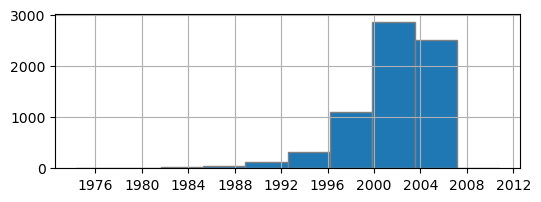

In [70]:
pk['Tanggal Lahir'].hist(figsize=(6,2), edgecolor='grey')
plt.show()

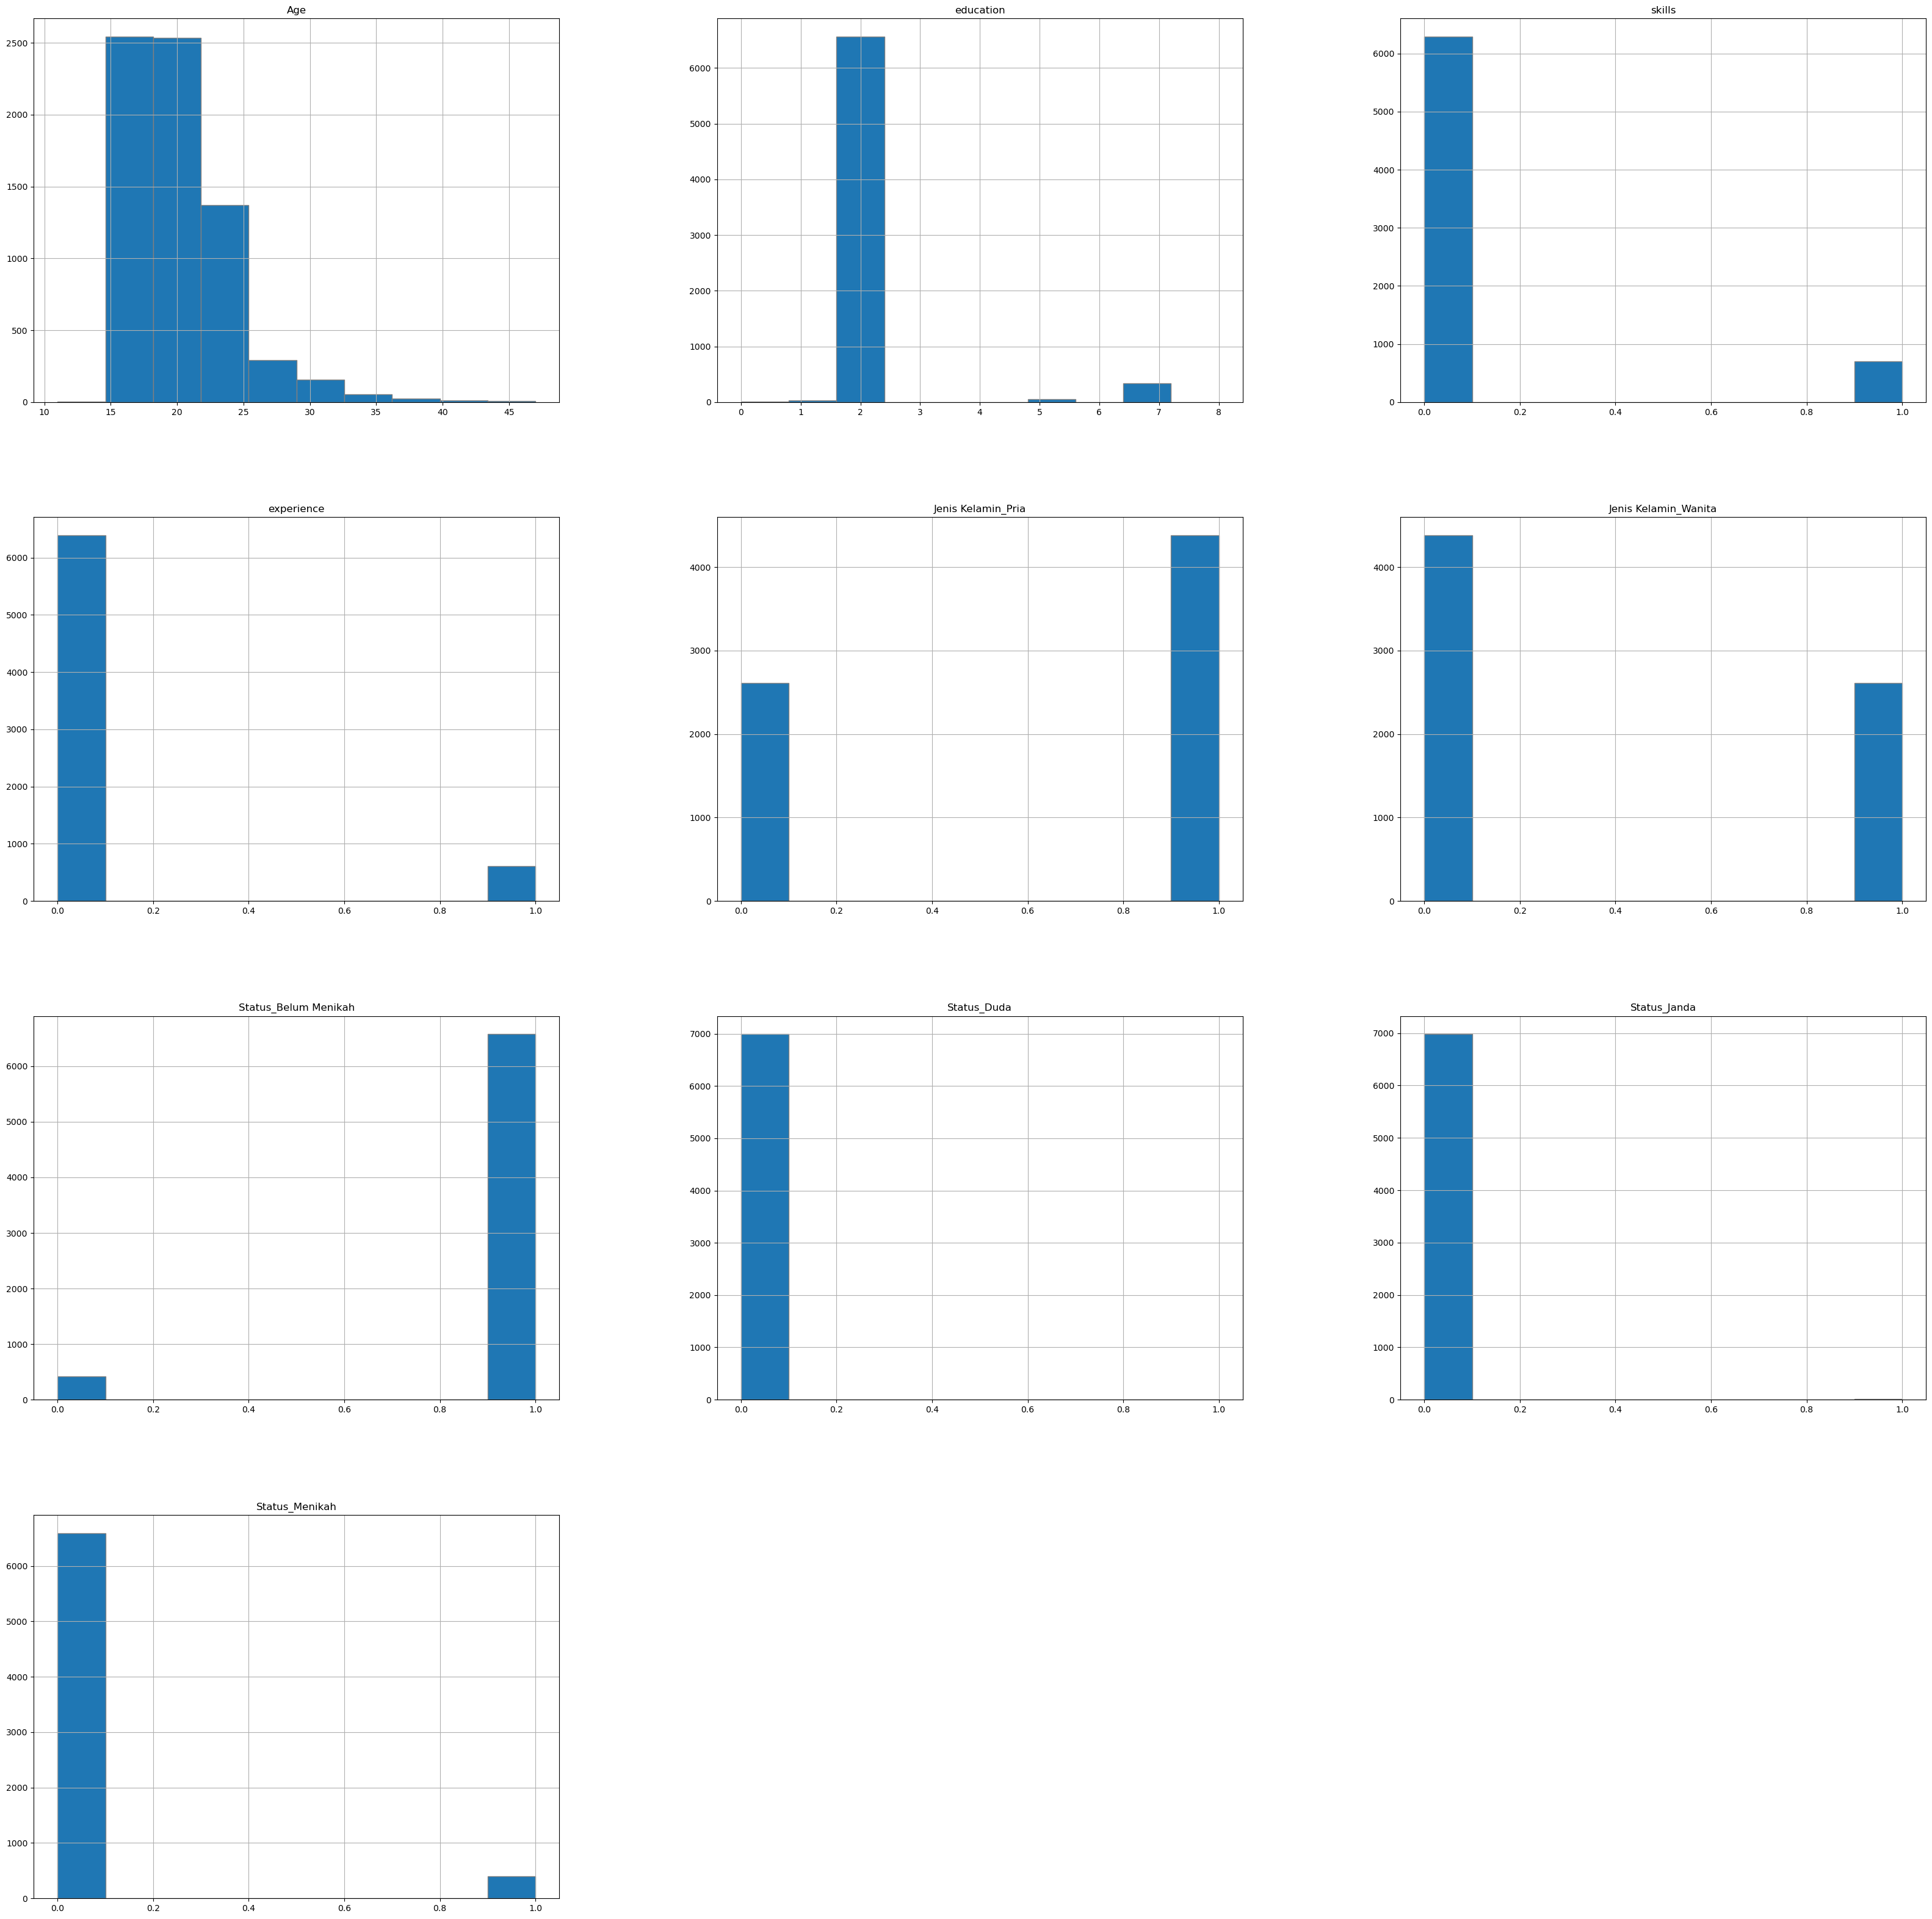

In [71]:
pk[numericals].hist(figsize=(40,40), edgecolor='grey')
plt.show()

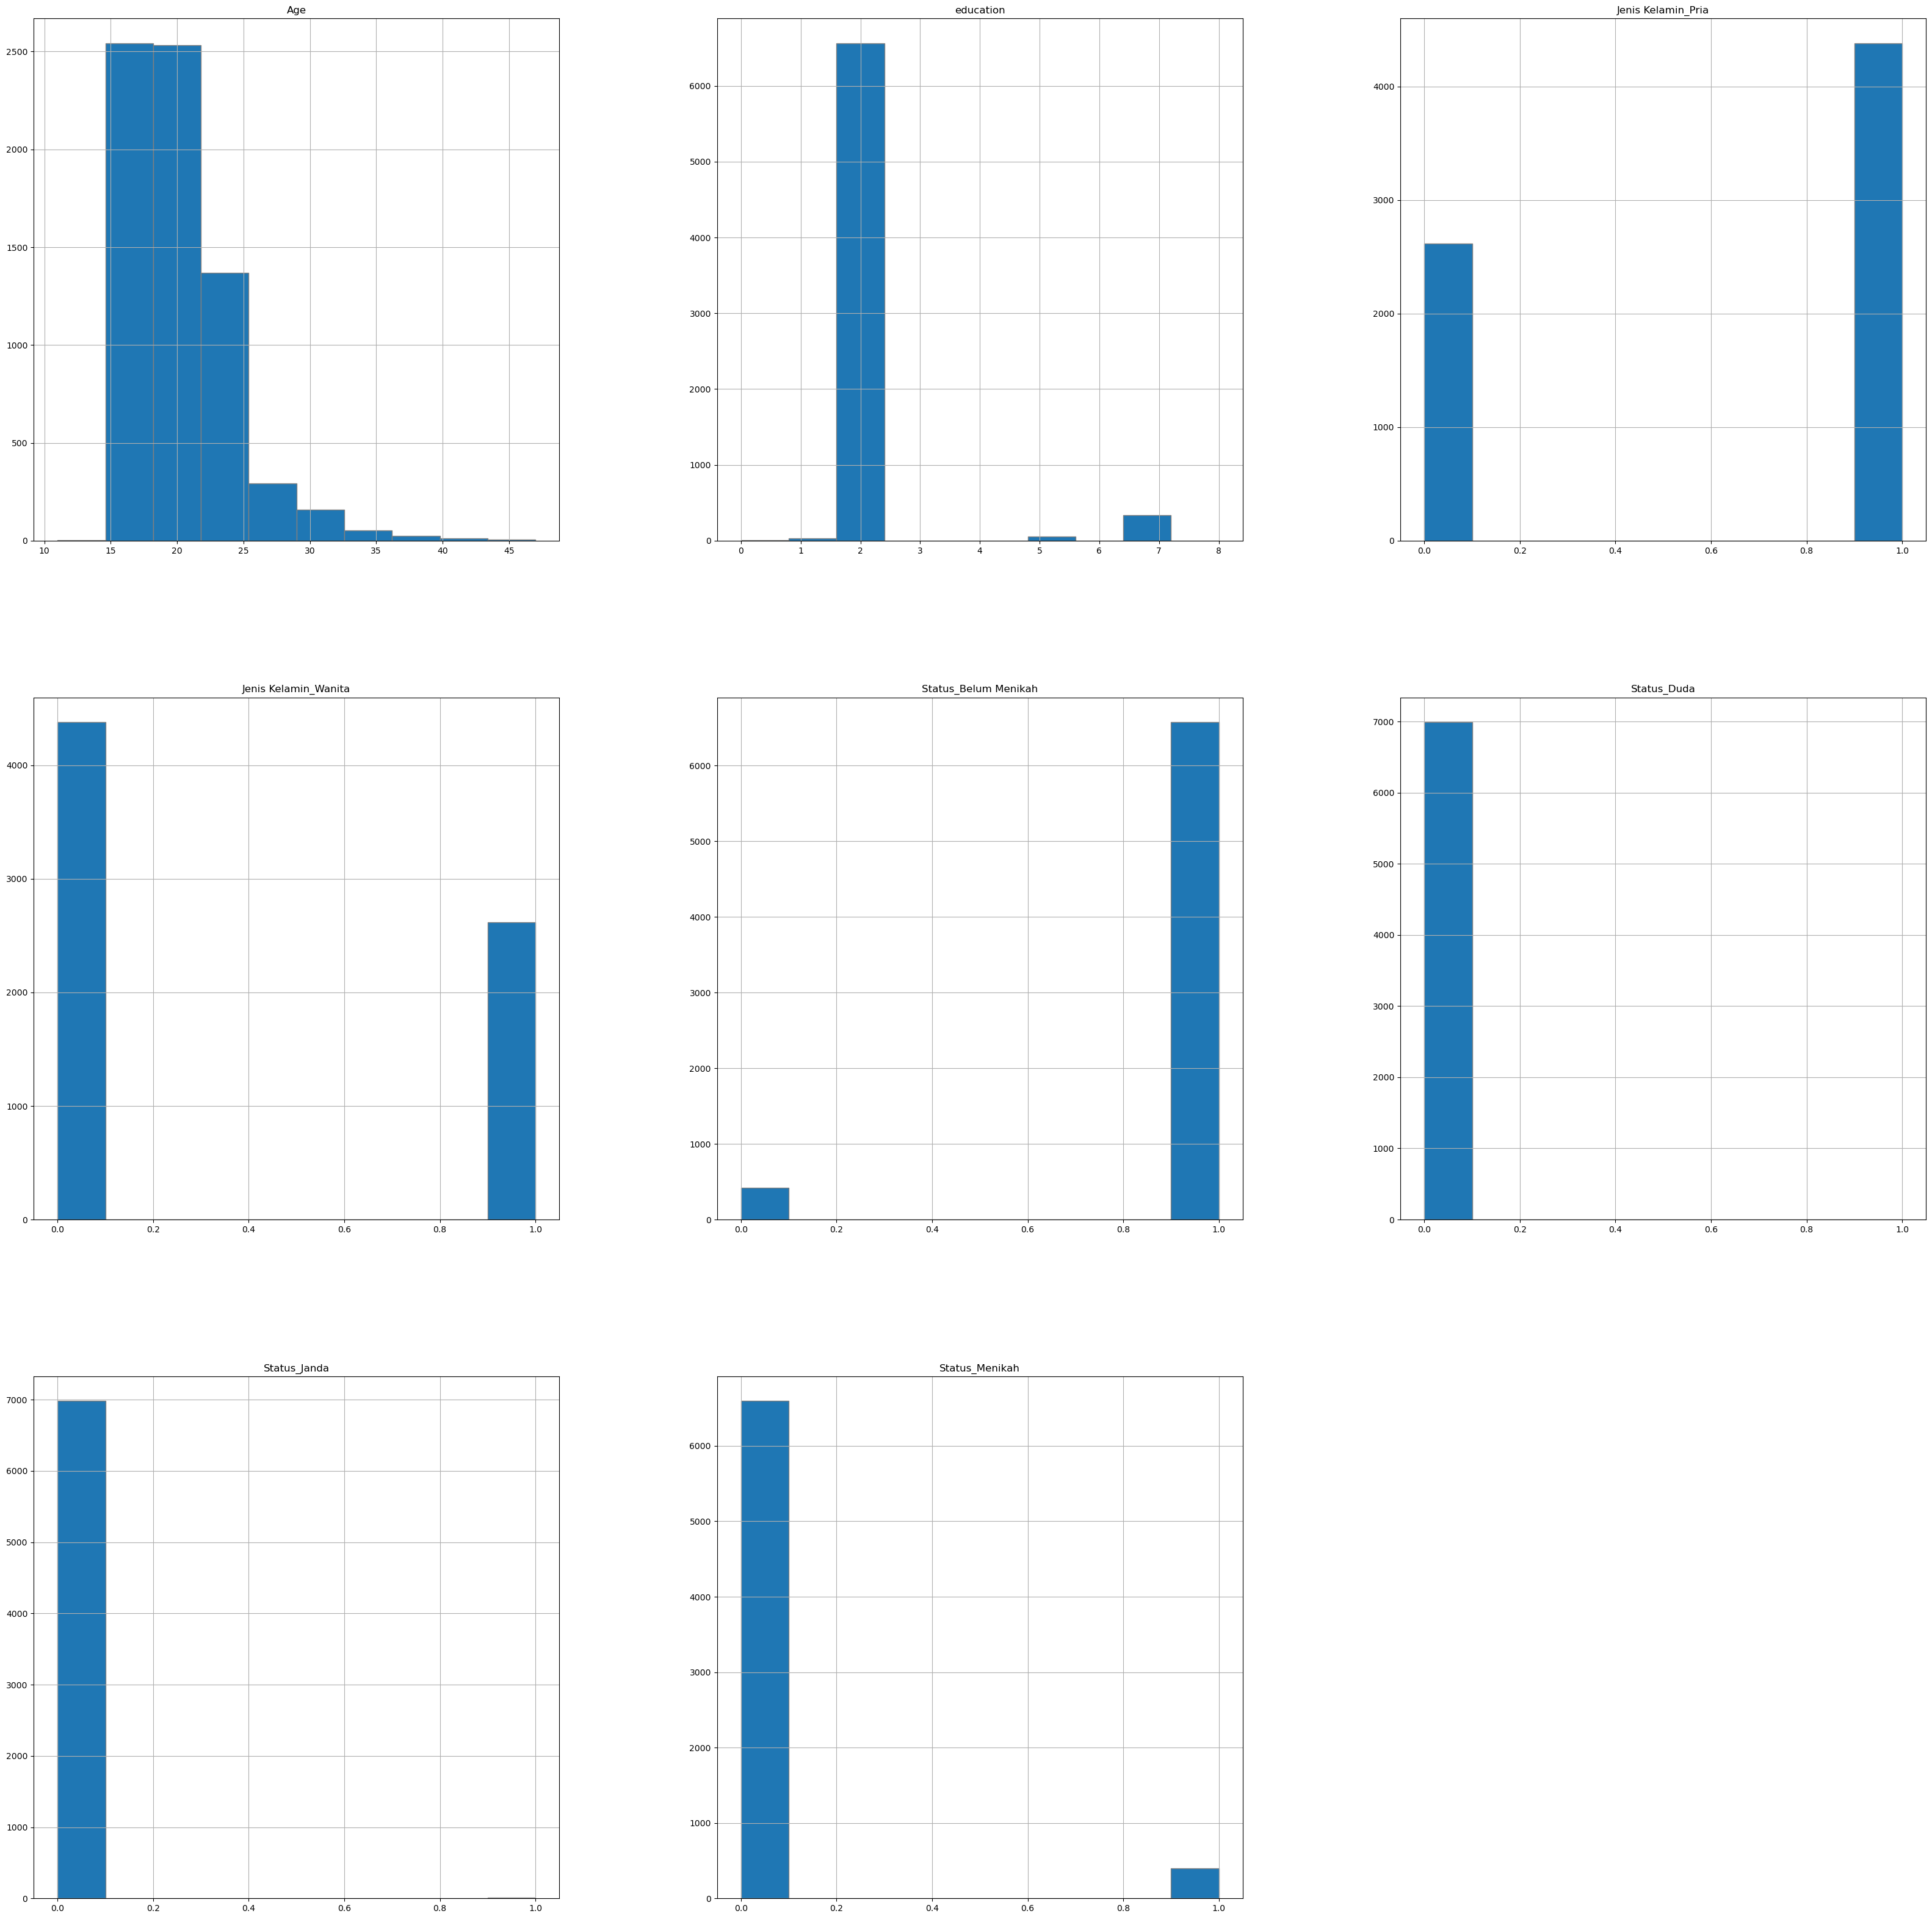

In [72]:
pk_copy[numerik].hist(figsize=(40,40), edgecolor='grey')
plt.show()

## Boxplot to detect outliers

### Boxplot dengan Asumsi skill dan experiece tidak di drop

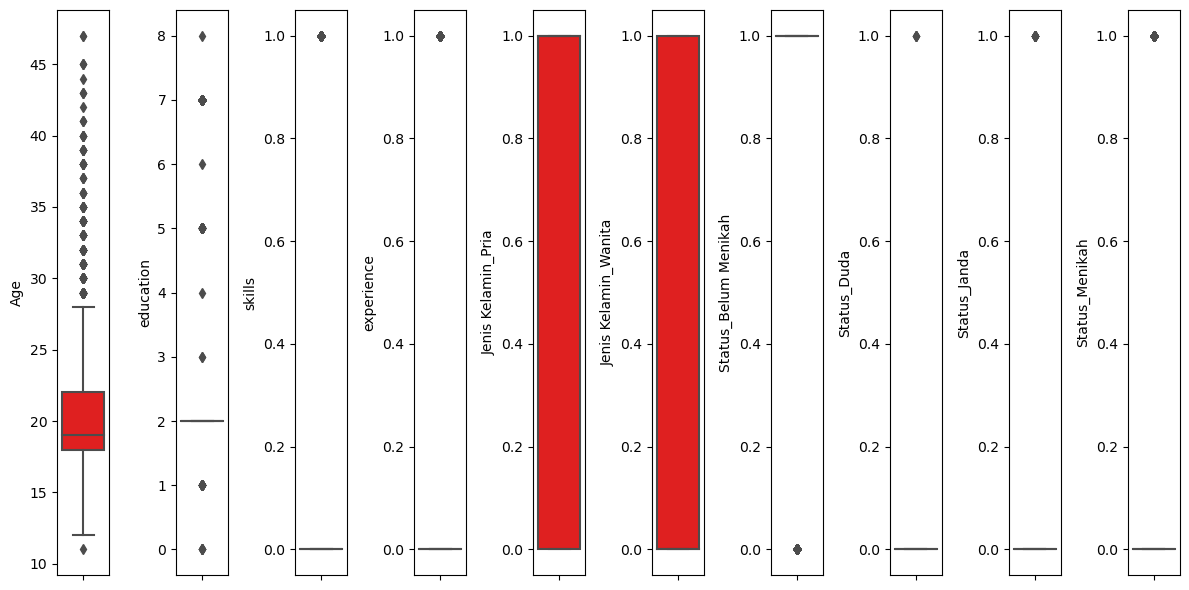

In [73]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=pk[features[i]], color='red')
    plt.tight_layout()

#### Outlier Handling

In [74]:
# outlier handling
features = numericals

Q1 = pk[features].quantile(0.25) # Same as np.percentile but maps (0,1) and not (0,100)
Q3 = pk[features].quantile(0.75)
IQR = Q3 - Q1

# Return a boolean array of the rows with (any) non-outlier column values
condition = ~((pk[features] < (Q1 - 1.5 * IQR)) | (pk[features] > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter our dataframe based on condition
pk_without_outliers = pk[condition]

#### Boxplot after Outlier Handling

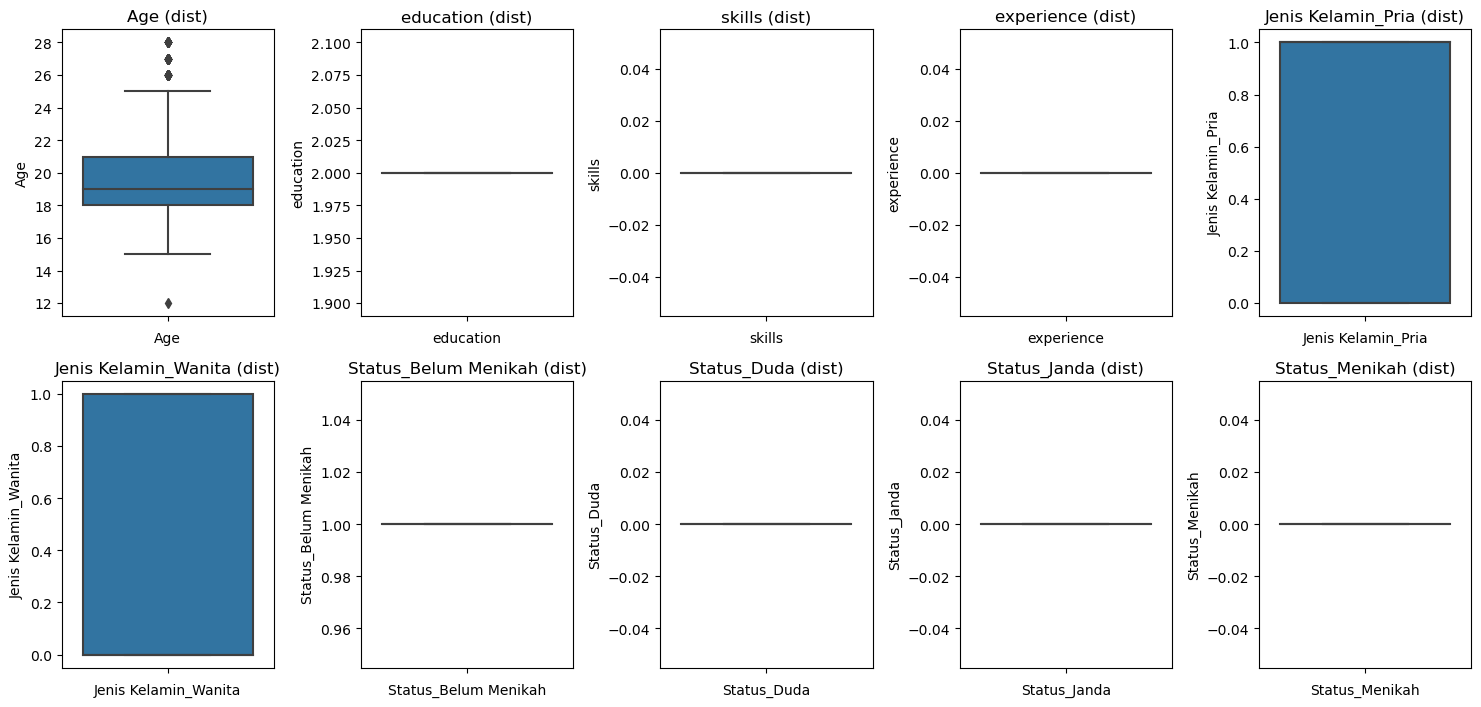

In [75]:
# Boxplot after outlier handling
# adjust the figure size for better readability
plt.figure(figsize=(15,35))

a = len(numericals)
b = 5
c = 1
for i in numericals:
    plt.subplot(a, b, c)
    plt.title('{} (dist)'.format(i, a, b, c))
    plt.xlabel(i)
    sns.boxplot(data = pk_without_outliers, y = i)
    c = c + 1

plt.tight_layout()
plt.show()

### Boxplot dengan variable skill dan experience di drop

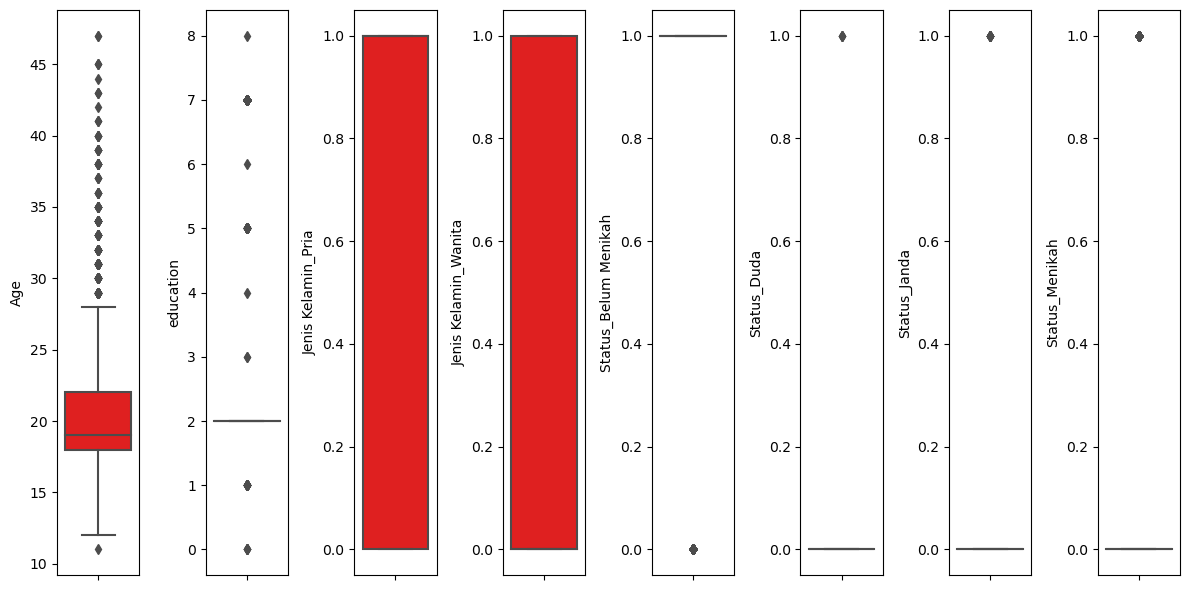

In [76]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
features = numerik
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=pk_copy[features[i]], color='red')
    plt.tight_layout()

#### Outlier Handling

In [77]:
# outlier handling
features = numerik

Q1 = pk_copy[features].quantile(0.25) # Same as np.percentile but maps (0,1) and not (0,100)
Q3 = pk_copy[features].quantile(0.75)
IQR = Q3 - Q1

# Return a boolean array of the rows with (any) non-outlier column values
condition = ~((pk_copy[features] < (Q1 - 1.5 * IQR)) | (pk_copy[features] > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter our dataframe based on condition
pk_without_outliers1 = pk_copy[condition]

#### Boxplot after Outlier Handling

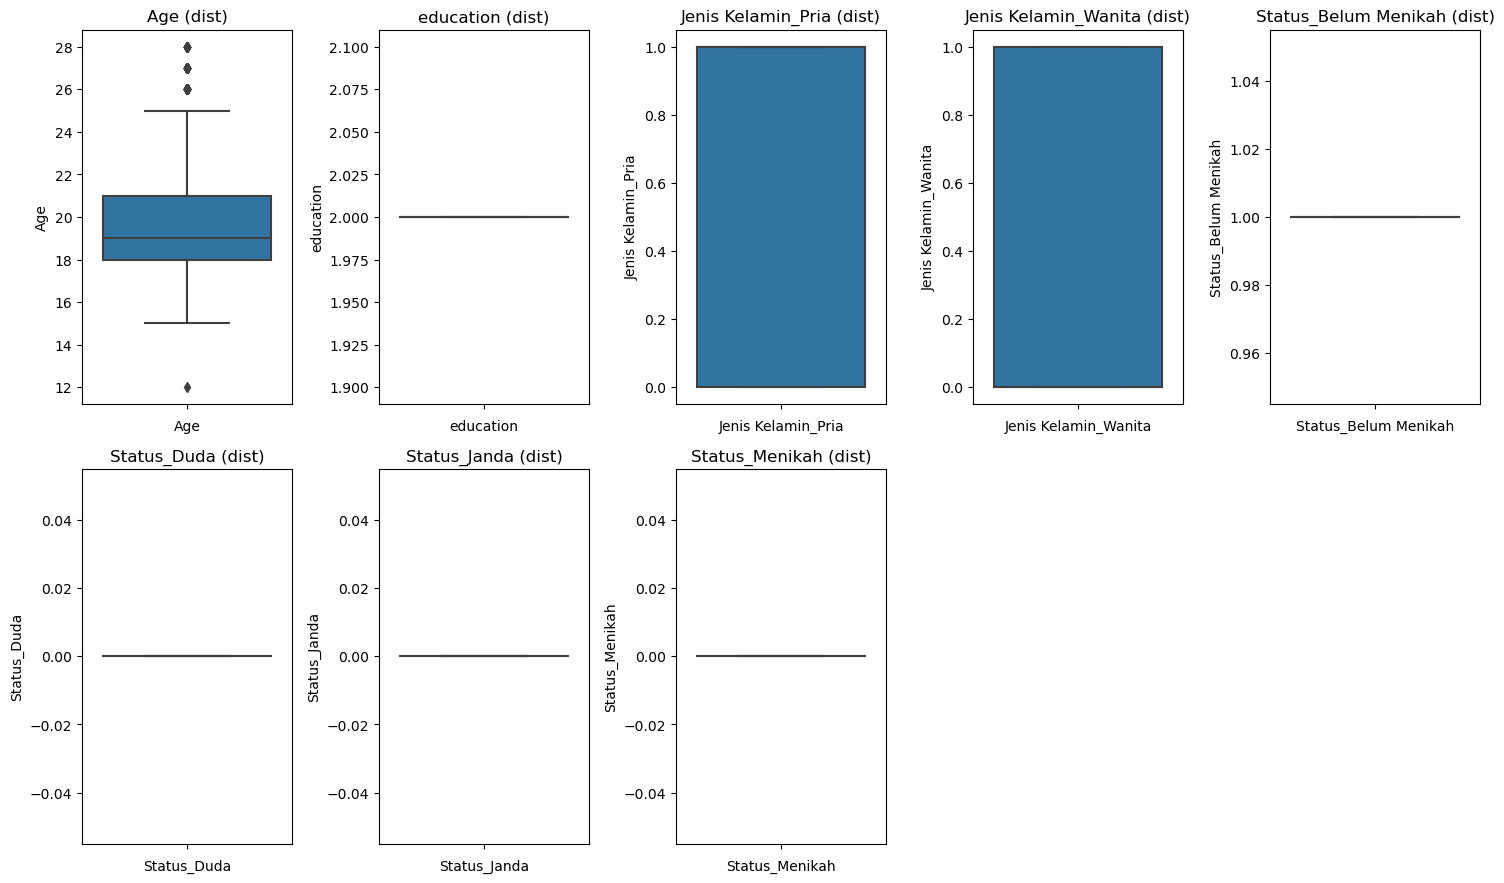

In [78]:
# Boxplot after outlier handling
# adjust the figure size for better readability
plt.figure(figsize=(15,35))

a = len(numerik)
b = 5
c = 1
for i in numerik:
    plt.subplot(a, b, c)
    plt.title('{} (dist)'.format(i, a, b, c))
    plt.xlabel(i)
    sns.boxplot(data = pk_without_outliers1, y = i)
    c = c + 1

plt.tight_layout()
plt.show()

# KDE plot for knowing the distribution form

## KDE dengan Asumsi Skills dan experience tidak di drop

### KDE Before Outlier Handling

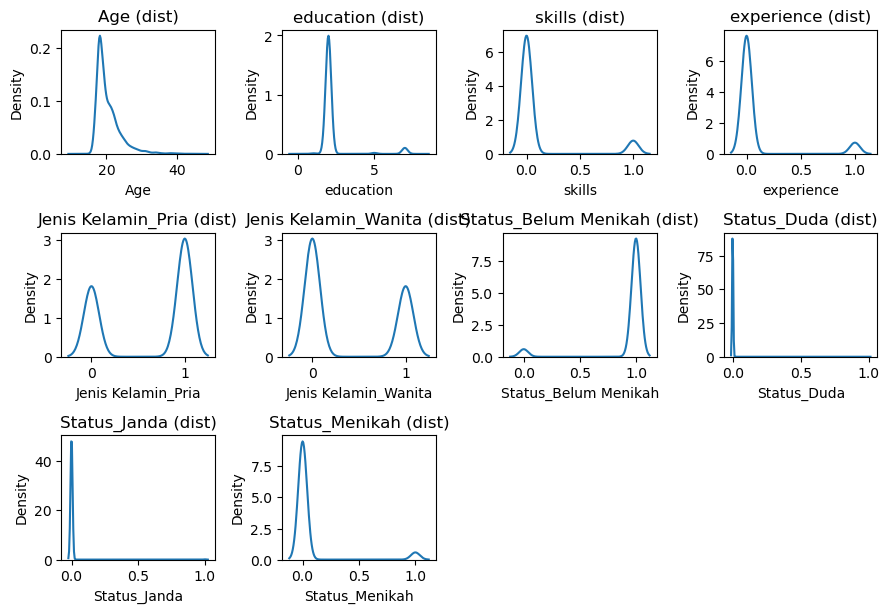

In [79]:
# KDE before outlier handling
# adjust the figure size for better readability
plt.figure(figsize=(9,20))

a = len(numericals)
b = 4
c = 1
for i in numericals:
    plt.subplot(a, b, c)
    plt.title('{} (dist)'.format(i, a, b, c))
    plt.xlabel(i)
    sns.kdeplot(data = pk, x = i)
    c = c + 1

plt.tight_layout()
plt.show()

### KDE after Outlier Handling

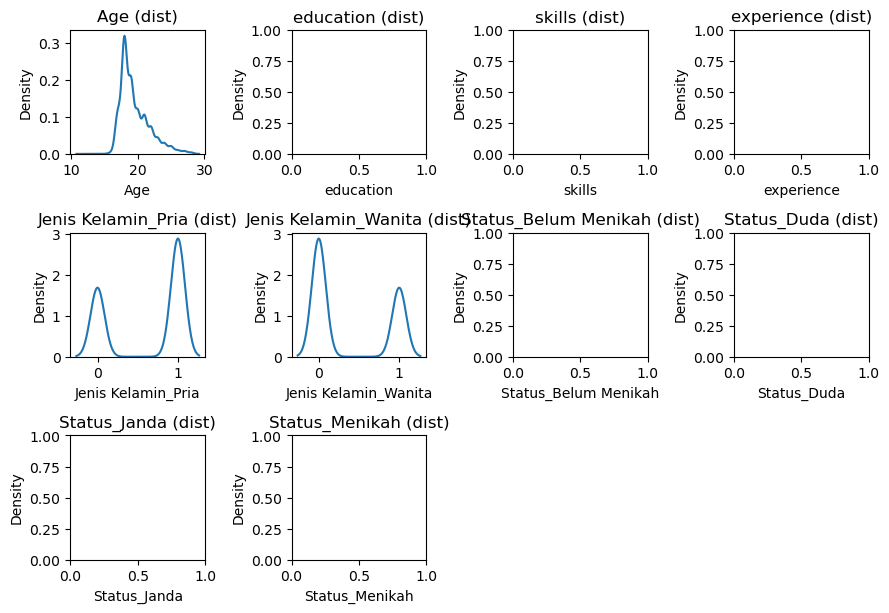

In [80]:
# KDE after outlier handling
# adjust the figure size for better readability
plt.figure(figsize=(9,20))

a = len(numericals)
b = 4
c = 1
for i in numericals:
    plt.subplot(a, b, c)
    plt.title('{} (dist)'.format(i, a, b, c))
    plt.xlabel(i)
    sns.kdeplot(data = pk_without_outliers, x = i)
    c = c + 1

plt.tight_layout()
plt.show()

## KDE dengan Asumsi skills dan experience di drop

### KDE before outlier handling

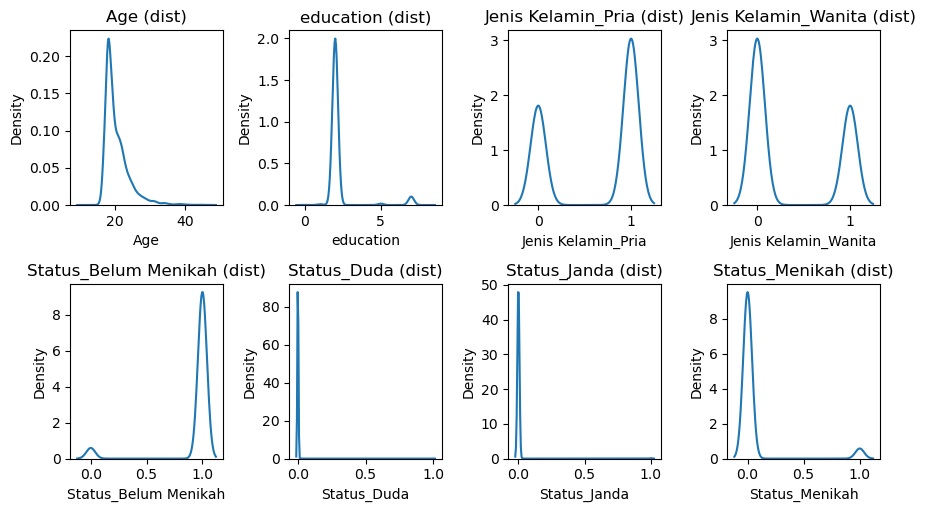

In [81]:
# KDE before outlier handling
# adjust the figure size for better readability
plt.figure(figsize=(9,20))

a = len(numerik)
b = 4
c = 1
for i in numerik:
    plt.subplot(a, b, c)
    plt.title('{} (dist)'.format(i, a, b, c))
    plt.xlabel(i)
    sns.kdeplot(data = pk_copy, x = i)
    c = c + 1

plt.tight_layout()
plt.show()

### KDE after Outlier Handling

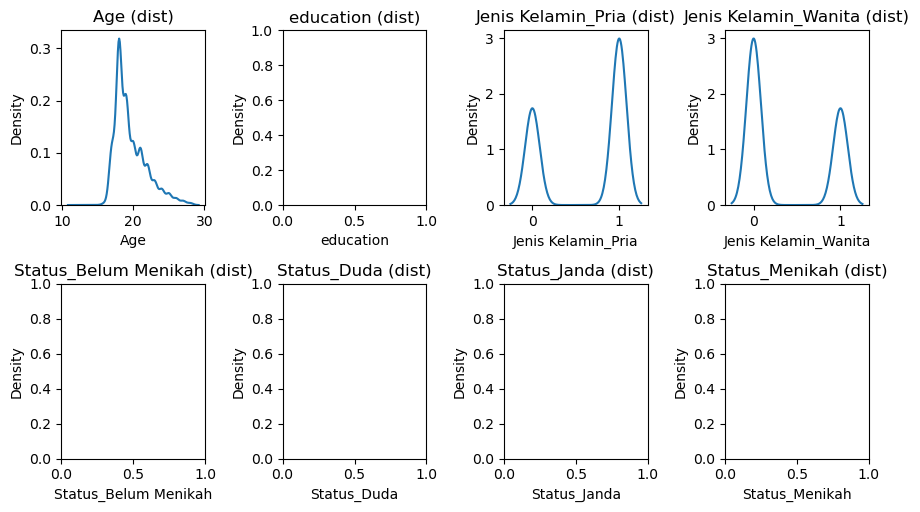

In [82]:
# KDE after outlier handling
# adjust the figure size for better readability
plt.figure(figsize=(9,20))

a = len(numerik)
b = 4
c = 1
for i in numerik:
    plt.subplot(a, b, c)
    plt.title('{} (dist)'.format(i, a, b, c))
    plt.xlabel(i)
    sns.kdeplot(data = pk_without_outliers1, x = i)
    c = c + 1

plt.tight_layout()
plt.show()

# Bivariate Analysis

In [83]:
# remember the dataset
pk.head(2)

Tanggal Daftar            Nama  Asal Lahir Tanggal Lahir  Age Jenis Kelamin  \
0     2022-01-03         Maryati  Pandeglang    2002-02-05   19        Wanita   
1     2022-01-26  Kokom komariah  Pandeglang    2001-12-26   20        Wanita   

                  Alamat Lengkap Kecamatan         Status Pendidikan  ...  \
0        Kp. Kadu Payung 007/004    Cisata  Belum Menikah        SMK  ...   
1  Kp. Kadu sirung rt 002 rw 003  Pulosari  Belum Menikah        SMK  ...   

  education skills experience Jenis Kelamin_Pria  Jenis Kelamin_Wanita  \
0         2      0          0                  0                     1   
1         2      0          0                  0                     1   

   Status_Belum Menikah  Status_Duda  Status_Janda  Status_Menikah  age_range  
0                     1            0             0               0      19-25  
1                     1            0             0               0      19-25  

[2 rows x 24 columns]

<Axes: xlabel='Status', ylabel='count'>

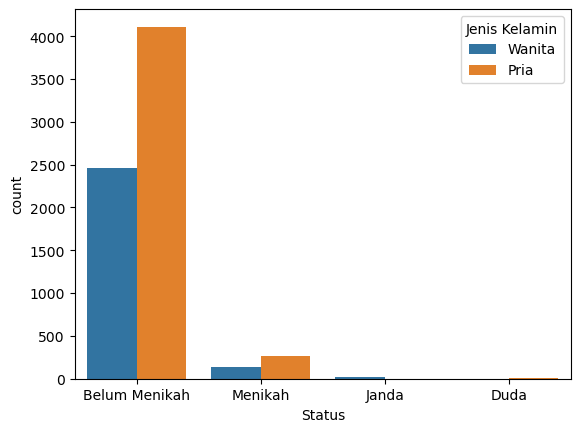

In [84]:

fig, ax = plt.subplots()
sns.countplot(data=pk,
            x='Status',
            hue ='Jenis Kelamin'
            )
#ax.set_xlim(1, 35)

<Axes: >

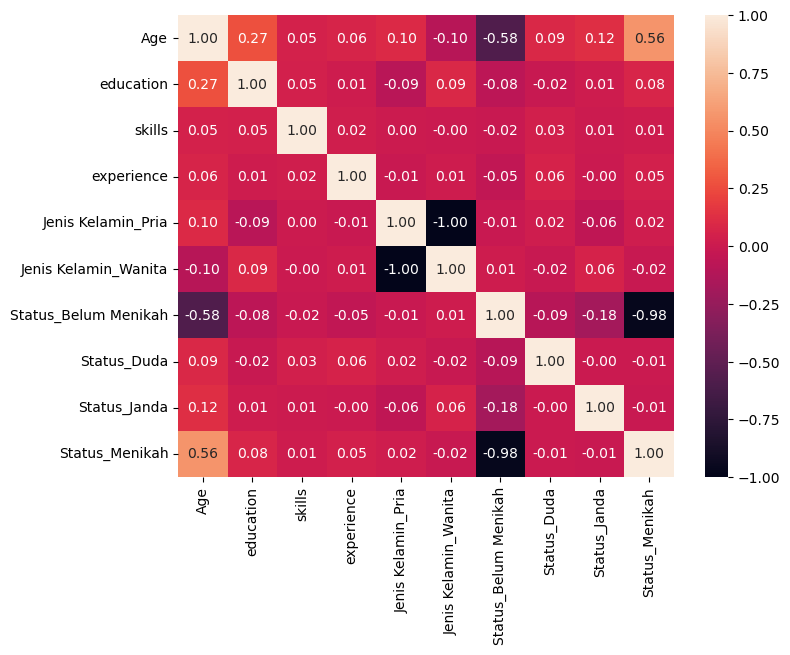

In [85]:
# correlation heatmap
plt.figure(figsize=(8,6))
correlation = pk.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

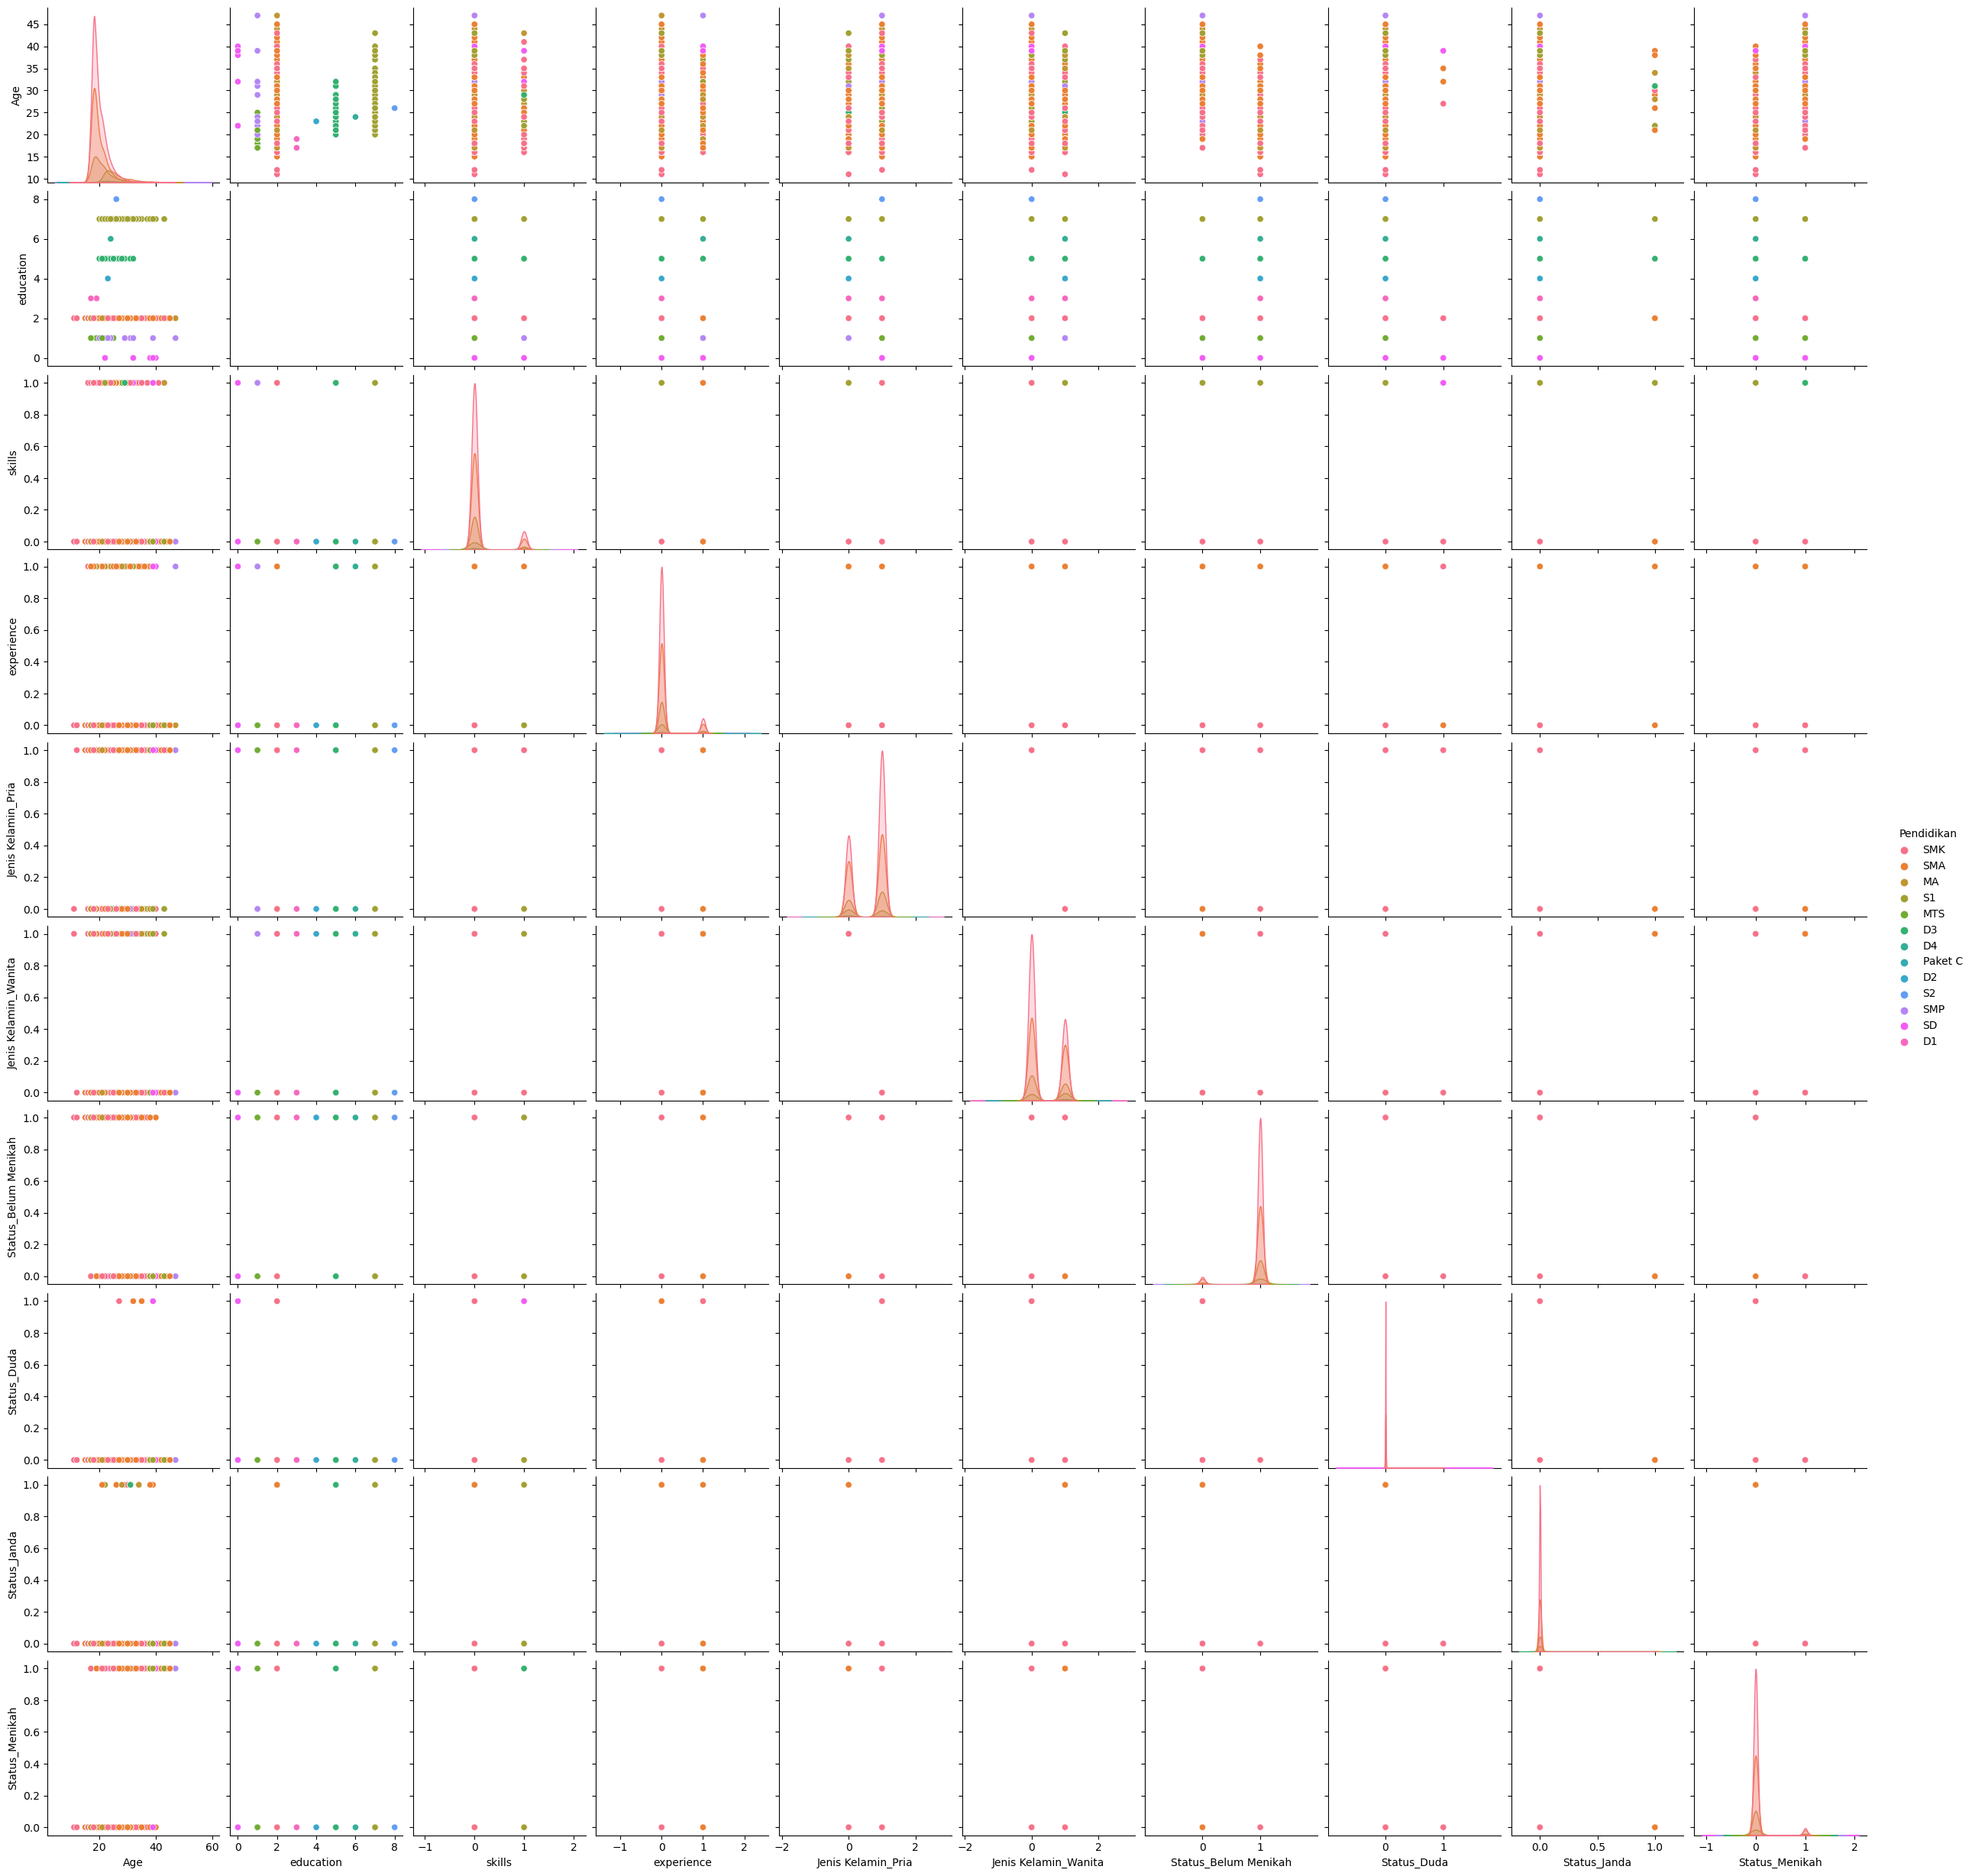

In [86]:
# pairplot of the data
sns.pairplot(pk, hue='Pendidikan')

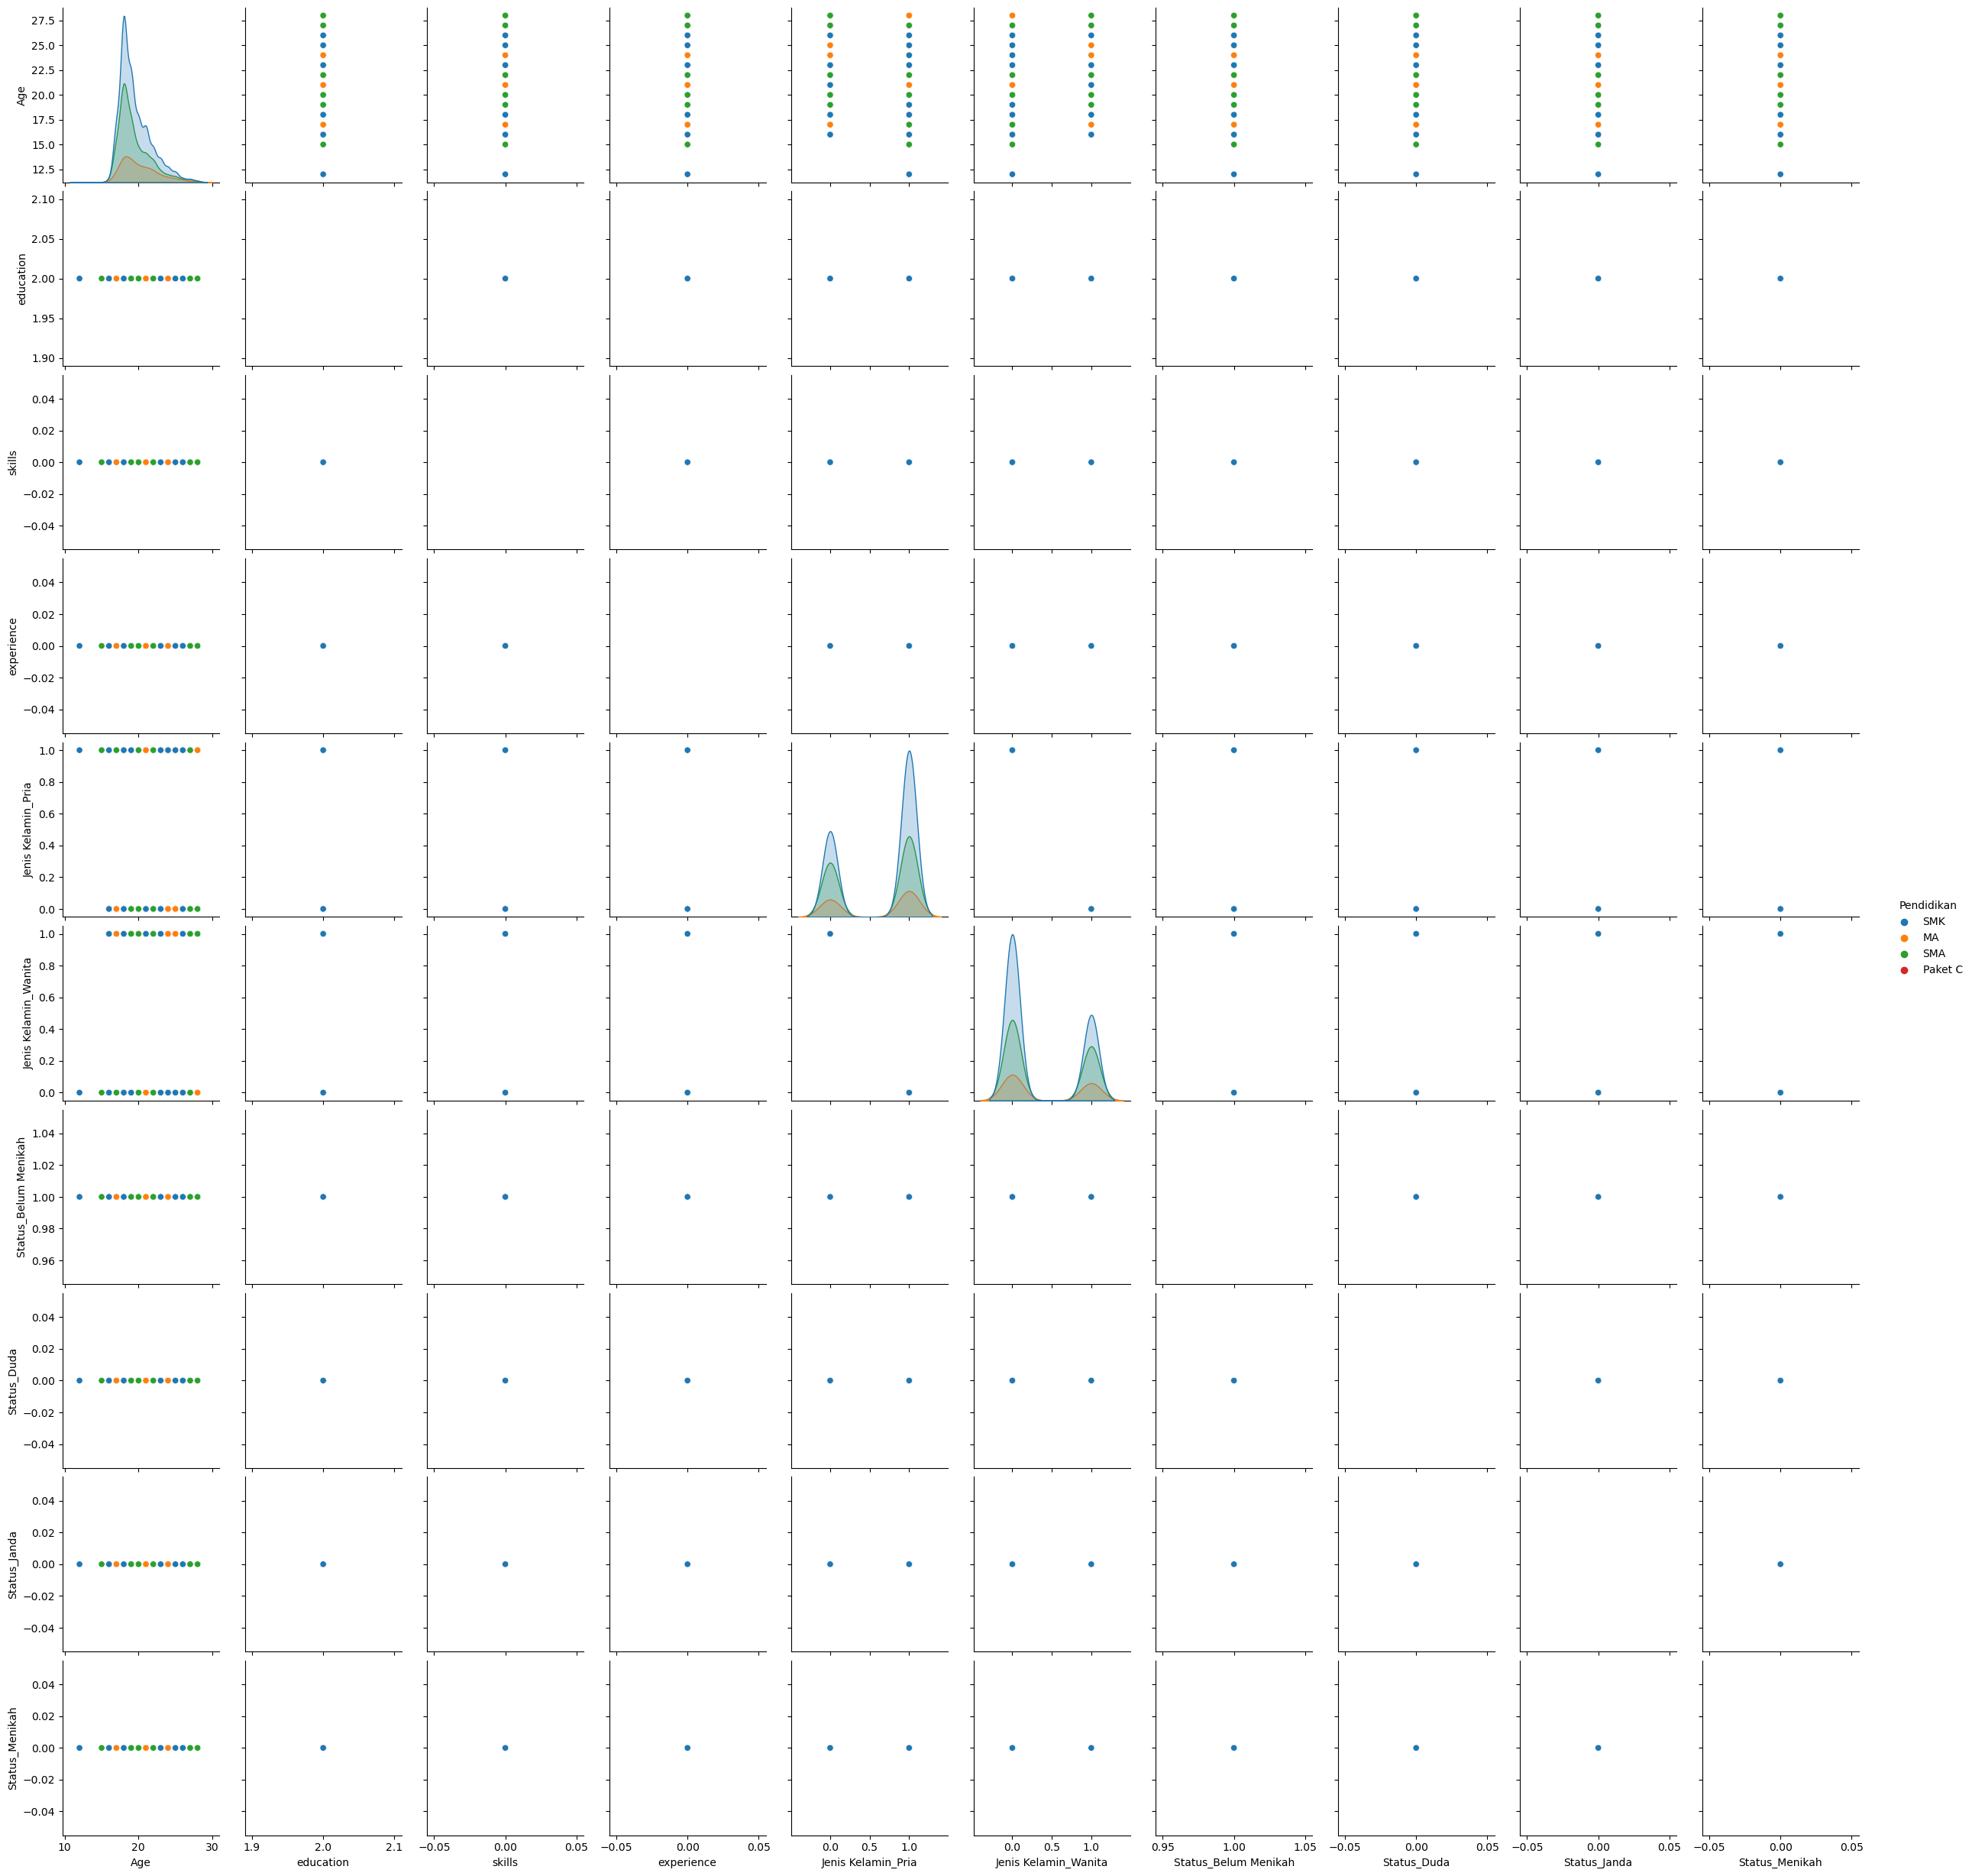

In [87]:
# pairplot of the data
sns.pairplot(pk_without_outliers, hue='Pendidikan')

# EDA Conclusion

# K-Means Clustering

In [88]:
#pk.info()

## Scalling

### Scalling dengan asumsi skills dan experience tidak di drop

In [89]:
# Scalling
from sklearn.preprocessing import StandardScaler

pk_ = ['Age', 'education', 'skills', 'experience', 'Jenis Kelamin_Pria', 'Jenis Kelamin_Wanita', 
       'Status_Belum Menikah', 'Status_Duda', 'Status_Janda', 'Status_Menikah']
X = pk[pk_].values

X_std = StandardScaler().fit_transform(X)
new_df = pd.DataFrame(data= X_std, columns = pk_)
new_df.describe()

Age     education        skills    experience  \
count  6.994000e+03  6.994000e+03  6.994000e+03  6.994000e+03   
mean  -1.300393e-16  1.788040e-16 -4.876473e-17 -8.737014e-17   
std    1.000071e+00  1.000071e+00  1.000071e+00  1.000071e+00   
min   -2.665898e+00 -2.050552e+00 -3.348141e-01 -3.082804e-01   
25%   -6.899241e-01 -2.335546e-01 -3.348141e-01 -3.082804e-01   
50%   -4.076420e-01 -2.335546e-01 -3.348141e-01 -3.082804e-01   
75%    4.392040e-01 -2.335546e-01 -3.348141e-01 -3.082804e-01   
max    7.496255e+00  5.217438e+00  2.986732e+00  3.243800e+00   

       Jenis Kelamin_Pria  Jenis Kelamin_Wanita  Status_Belum Menikah  \
count        6.994000e+03           6994.000000          6.994000e+03   
mean         1.056569e-16              0.000000         -1.219118e-16   
std          1.000071e+00              1.000071          1.000071e+00   
min         -1.294052e+00             -0.772767         -3.961329e+00   
25%         -1.294052e+00             -0.772767          2.524406e-01   
50%          7.727667e-01             -0.772767          2.524406e-01   
75%          7.727667e-01              1.294052          2.524406e-01   
max          7.727667e-01              1.294052          2.524406e-01   

        Status_Duda  Status_Janda  Status_Menikah  
count  6.994000e+03  6.994000e+03    6.994000e+03  
mean  -8.127455e-18 -1.828677e-17   -3.657355e-17  
std    1.000071e+00  1.000071e+00    1.000071e+00  
min   -2.392167e-02 -4.636060e-02   -2.462950e-01  
25%   -2.392167e-02 -4.636060e-02   -2.462950e-01  
50%   -2.392167e-02 -4.636060e-02   -2.462950e-01  
75%   -2.392167e-02 -4.636060e-02   -2.462950e-01  
max    4.180311e+01  2.157004e+01    4.060172e+00

<Axes: >

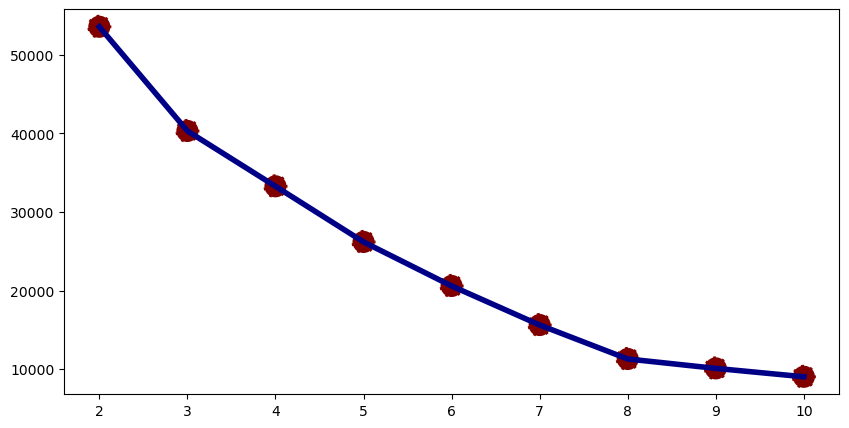

In [90]:

from sklearn.cluster import KMeans
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(new_df.values)
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize = (10, 5))

sns.lineplot(x = range(2, 11), y = inertia, color = '#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--')

In [91]:
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2, 11))
print(range_n_clusters)

[2, 3, 4, 5, 6, 7, 8, 9, 10]


In [92]:
arr_silhouette_score_euclidean = []

for i in range_n_clusters:
    kmeans = KMeans(n_clusters = i).fit(new_df)
    preds = kmeans.predict(new_df)
    
    score_euclidean = silhouette_score(new_df, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

<Axes: >

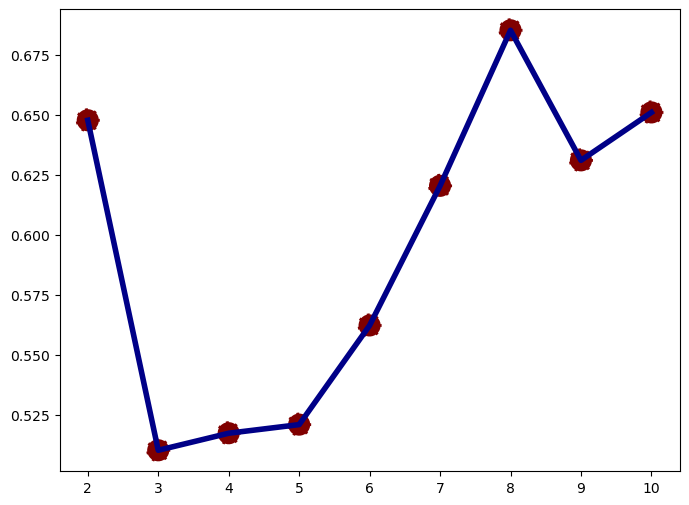

In [93]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=range(2,11), y=arr_silhouette_score_euclidean, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2,11), y=arr_silhouette_score_euclidean, s=300, color='#800000',  linestyle='--')

In [94]:
### Candidat clustering 3 dan 8

### K-Means Clustering dengan asumsi skills dan experience tidak di drop

In [95]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 8, random_state = 0)
kmeans.fit(new_df.values)

KMeans(random_state=0)

In [96]:
# clusters' centroid analysis
# derive average of each feature (column)
pk['cluster'] = kmeans.labels_
centroid_df = pk.groupby('cluster')[['Age','education', 'skills', 'experience', 'Jenis Kelamin_Pria', 'Jenis Kelamin_Wanita',
       'Status_Belum Menikah', 'Status_Duda', 'Status_Janda', 'Status_Menikah']].agg({'Age': 'mean','education': 'mean', 'skills': 'mean', 
                                                                                      'experience':'mean', 'Jenis Kelamin_Pria':'mean',
                                                                             'Jenis Kelamin_Wanita': 'mean', 'Status_Belum Menikah': 'mean', 'Status_Duda':'mean',
                                                                             'Status_Janda': 'mean', 'Status_Menikah': 'mean'}).reset_index()
centroid_df

cluster        Age  education    skills  experience  Jenis Kelamin_Pria  \
0        0  19.185068   1.998423  0.000000    0.000000            0.000000   
1        1  19.940498   1.995750  0.000000    0.000000            1.000000   
2        2  28.482500   2.605000  0.115000    0.140000            0.662500   
3        3  33.250000   1.500000  0.500000    0.750000            1.000000   
4        4  29.800000   2.533333  0.133333    0.066667            0.000000   
5        5  19.975048   2.026871  0.126679    1.000000            0.623800   
6        6  23.691589   6.831776  0.161994    0.080997            0.436137   
7        7  20.162011   2.003724  1.000000    0.000000            0.653631   

   Jenis Kelamin_Wanita  Status_Belum Menikah  Status_Duda  Status_Janda  \
0              1.000000                   1.0          0.0           0.0   
1              0.000000                   1.0          0.0           0.0   
2              0.337500                   0.0          0.0           0.0   
3              0.000000                   0.0          1.0           0.0   
4              1.000000                   0.0          0.0           1.0   
5              0.376200                   1.0          0.0           0.0   
6              0.563863                   1.0          0.0           0.0   
7              0.346369                   1.0          0.0           0.0   

   Status_Menikah  
0             0.0  
1             0.0  
2             1.0  
3             0.0  
4             0.0  
5             0.0  
6             0.0  
7             0.0

### Scalling dengan asumsi skills dan experience di drop

In [97]:
# Scalling
from sklearn.preprocessing import StandardScaler

new_pk = ['Age', 'education', 'Jenis Kelamin_Pria', 'Jenis Kelamin_Wanita', 
       'Status_Belum Menikah', 'Status_Duda', 'Status_Janda', 'Status_Menikah']
X = pk[new_pk].values

X_std = StandardScaler().fit_transform(X)
df_ = pd.DataFrame(data= X_std, columns = new_pk)
df_.describe()

Age     education  Jenis Kelamin_Pria  Jenis Kelamin_Wanita  \
count  6.994000e+03  6.994000e+03        6.994000e+03           6994.000000   
mean  -1.300393e-16  1.788040e-16        1.056569e-16              0.000000   
std    1.000071e+00  1.000071e+00        1.000071e+00              1.000071   
min   -2.665898e+00 -2.050552e+00       -1.294052e+00             -0.772767   
25%   -6.899241e-01 -2.335546e-01       -1.294052e+00             -0.772767   
50%   -4.076420e-01 -2.335546e-01        7.727667e-01             -0.772767   
75%    4.392040e-01 -2.335546e-01        7.727667e-01              1.294052   
max    7.496255e+00  5.217438e+00        7.727667e-01              1.294052   

       Status_Belum Menikah   Status_Duda  Status_Janda  Status_Menikah  
count          6.994000e+03  6.994000e+03  6.994000e+03    6.994000e+03  
mean          -1.219118e-16 -8.127455e-18 -1.828677e-17   -3.657355e-17  
std            1.000071e+00  1.000071e+00  1.000071e+00    1.000071e+00  
min           -3.961329e+00 -2.392167e-02 -4.636060e-02   -2.462950e-01  
25%            2.524406e-01 -2.392167e-02 -4.636060e-02   -2.462950e-01  
50%            2.524406e-01 -2.392167e-02 -4.636060e-02   -2.462950e-01  
75%            2.524406e-01 -2.392167e-02 -4.636060e-02   -2.462950e-01  
max            2.524406e-01  4.180311e+01  2.157004e+01    4.060172e+00

<Axes: >

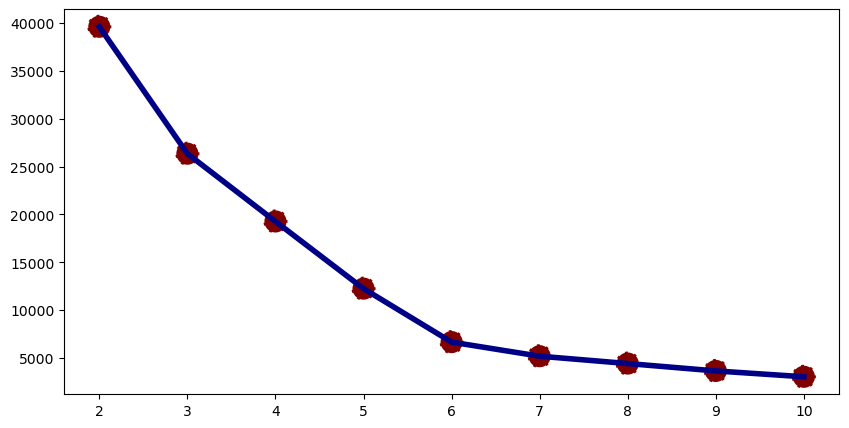

In [98]:
from sklearn.cluster import KMeans
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(df_.values)
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize = (10, 5))

sns.lineplot(x = range(2, 11), y = inertia, color = '#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--')

In [99]:
### Candidat clustering 3 dan 6

In [100]:
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2, 11))
print(range_n_clusters)

[2, 3, 4, 5, 6, 7, 8, 9, 10]


<Axes: >

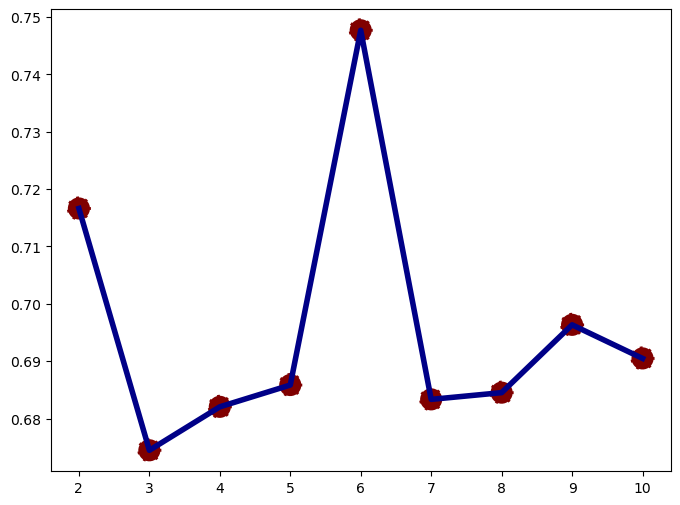

In [101]:
arr_silhouette_score_euclidean = []

for i in range_n_clusters:
    kmeans = KMeans(n_clusters = i).fit(df_)
    preds = kmeans.predict(df_)
    
    score_euclidean = silhouette_score(df_, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=range(2,11), y=arr_silhouette_score_euclidean, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2,11), y=arr_silhouette_score_euclidean, s=300, color='#800000',  linestyle='--')

In [102]:
### Candidat clustering 3 dan 5 dan 6

### K-Means Clustering dengan asumsi skills dan experience di drop

In [103]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 6, random_state = 0)
kmeans.fit(df_.values)

KMeans(n_clusters=6, random_state=0)

In [104]:
# clusters' centroid analysis
# derive average of each feature (column)
pk_copy['cluster'] = kmeans.labels_
centroid_df = pk_copy.groupby('cluster')[['Age','education', 'Jenis Kelamin_Pria', 'Jenis Kelamin_Wanita',
       'Status_Belum Menikah', 'Status_Duda', 'Status_Janda', 'Status_Menikah']].agg({'Age': 'mean','education': 'mean', 'Jenis Kelamin_Pria':'mean',
                                                                             'Jenis Kelamin_Wanita': 'mean', 'Status_Belum Menikah': 'mean', 'Status_Duda':'mean',
                                                                             'Status_Janda': 'mean', 'Status_Menikah': 'mean'}).reset_index()
centroid_df

cluster        Age  education  Jenis Kelamin_Pria  Jenis Kelamin_Wanita  \
0        0  19.243860   1.998246            0.000000              1.000000   
1        1  20.008319   1.995463            1.000000              0.000000   
2        2  28.482500   2.605000            0.662500              0.337500   
3        3  23.670732   6.792683            0.435976              0.564024   
4        4  33.250000   1.500000            1.000000              0.000000   
5        5  29.800000   2.533333            0.000000              1.000000   

   Status_Belum Menikah  Status_Duda  Status_Janda  Status_Menikah  
0                   1.0          0.0           0.0             0.0  
1                   1.0          0.0           0.0             0.0  
2                   0.0          0.0           0.0             1.0  
3                   1.0          0.0           0.0             0.0  
4                   0.0          1.0           0.0             0.0  
5                   0.0          0.0           1.0             0.0

In [105]:
pk_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6994 entries, 0 to 7145
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Tanggal Daftar        6994 non-null   datetime64[ns]
 1   Nama                  6994 non-null   object        
 2   Asal Lahir            6994 non-null   object        
 3   Tanggal Lahir         6994 non-null   datetime64[ns]
 4   Age                   6994 non-null   int32         
 5   Jenis Kelamin         6994 non-null   object        
 6   Alamat Lengkap        6994 non-null   object        
 7   Kecamatan             6994 non-null   object        
 8   Status                6994 non-null   object        
 9   Pendidikan            6994 non-null   object        
 10  Jurusan               6994 non-null   object        
 11  Tahun Lulus           6994 non-null   object        
 12  No HP                 6963 non-null   object        
 13  Email             